In [3]:
#libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.api import add_constant, Logit
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, auc, classification_report

In [3]:
pwd

'C:\\Users\\GOJIRAH'

In [227]:
#Change the current working directory to load the file
os.chdir("D:/study/imarticus/python/pandas files")

In [228]:
#To read the csv file of the Bank Personal Loan Modelling
data = pd.read_csv("Bank_Personal_Loan.csv")

# Data Description:
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.


# Attribute Information:

1.ID : Customer ID

2.Age : Customer's age in completed years

3.Experience : #years of professional experience

4.Income : Annual income of the customer ($000)

5.ZIP Code : Home Address ZIP code.

6.Family : Family size of the customer

7.CCAvg : Avg. spending on credit cards per month ($000)

8.Education : Education Level.
1: Undergrad;
2: Graduate;
3: Advanced/Professional

9.Mortgage : Value of house mortgage if any. ($000)

10.Personal Loan : Did this customer accept the personal loan offered in the last campaign?

11.Securities Account : Does the customer have a securities account with the bank?

12.CD Account : Does the customer have a certificate of deposit (CD) account with the bank?

13.Online : Does the customer use internet banking facilities?

14.Credit card : Does the customer use a credit card issued by

In [8]:
#It shows the first five datapoints of the dataset
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1


In [9]:
#It shows the last five datapoints of the dataset
data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3.0,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4.0,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39.0,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40.0,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4.0,83,92612,3,0.8,1,0,0,0,0,1,1


In [10]:
#It randomly shows the 10 datapoints of the dataset
data.sample(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3308,3309,48,23.0,108,92120,2,3.8,3,0,0,0,0,0,1
1999,2000,48,22.0,80,93940,2,2.4,2,0,0,0,0,1,0
2168,2169,55,29.0,64,93063,4,2.6,3,0,0,0,0,1,0
2642,2643,54,29.0,81,92096,2,0.0,3,0,0,0,0,1,0
4302,4303,52,27.0,85,92037,3,3.4,3,0,1,0,0,0,0
1712,1713,44,20.0,20,92780,1,1.4,3,0,0,0,0,0,0
4129,4130,29,3.0,10,91320,4,0.4,1,87,0,0,0,1,1
2399,2400,62,36.0,41,90245,2,1.0,3,154,0,1,0,1,0
1621,1622,31,6.0,53,92093,4,2.2,1,114,0,0,0,1,0
1310,1311,62,36.0,21,95616,3,0.3,3,0,0,0,0,0,0


In [12]:
#To check the size of the data
data.shape

(5000, 14)

In [13]:
#number of rows on the dataset
data.shape[0]

5000

In [14]:
#number of columns of the dataset
data.shape[1]

14

In [16]:
#information about the dataset
#it shows the non missing values  
#it shows the datatype of the each features(columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# Checking the missing values

In [11]:
#This block is used to check the missing values
#Total = Total number of the missing values
#percent = Percentage of the missing values
total = (data.isna().sum()).sort_values(ascending = False)
percent= (data.isna().sum()*100/data.isna().count()).sort_values(ascending = False)
missing_values = pd.concat([total,percent],axis = 1,keys = ["Total","percentage"])


In [12]:
missing_values

,Total,percentage
Experience,8,0.16
CreditCard,0,0.00
Online,0,0.00
CD Account,0,0.00
Securities Account,0,0.00
Personal Loan,0,0.00
Mortgage,0,0.00
Education,0,0.00
CCAvg,0,0.00
Family,0,0.00


In [7]:
#To extract only the numerical Variable
df_num = [col for col in data.columns if data[col].dtypes != object]
data[df_num]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3.0,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4.0,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39.0,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40.0,49,90034,3,0.5,2,0,0,0,0,1,0


In [9]:
#Library for KnnImputer for missing value
from sklearn.impute import KNNImputer

In [10]:
knn = KNNImputer(n_neighbors = 5).fit(data[df_num])

In [11]:
#Creating dataframe
num = pd.DataFrame(knn.transform(data[df_num]))
num

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,25.0,1.0,49.0,91107.0,4.0,1.6,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2.0,45.0,19.0,34.0,90089.0,3.0,1.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3.0,39.0,15.0,11.0,94720.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,35.0,9.0,100.0,94112.0,1.0,2.7,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,35.0,8.0,45.0,91330.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996.0,29.0,3.0,40.0,92697.0,1.0,1.9,3.0,0.0,0.0,0.0,0.0,1.0,0.0
4996,4997.0,30.0,4.0,15.0,92037.0,4.0,0.4,1.0,85.0,0.0,0.0,0.0,1.0,0.0
4997,4998.0,63.0,39.0,24.0,93023.0,2.0,0.3,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,4999.0,65.0,40.0,49.0,90034.0,3.0,0.5,2.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
data[df_num].columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [12]:
#Renaming the columns to its original column name
num = num.rename(columns = {0:'ID', 1:'Age', 2:'Experience', 3:'Income', 4:'ZIP Code', 5:'Family', 6:'CCAvg',
       7:'Education', 8:'Mortgage', 9:'Personal Loan', 10:'Securities Account',
       11:'CD Account', 12:'Online', 13:'CreditCard'})

In [43]:
num

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.0,25.0,1.0,49.0,91107.0,4.0,1.6,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2.0,45.0,19.0,34.0,90089.0,3.0,1.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3.0,39.0,15.0,11.0,94720.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,35.0,9.0,100.0,94112.0,1.0,2.7,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,35.0,8.0,45.0,91330.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996.0,29.0,3.0,40.0,92697.0,1.0,1.9,3.0,0.0,0.0,0.0,0.0,1.0,0.0
4996,4997.0,30.0,4.0,15.0,92037.0,4.0,0.4,1.0,85.0,0.0,0.0,0.0,1.0,0.0
4997,4998.0,63.0,39.0,24.0,93023.0,2.0,0.3,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,4999.0,65.0,40.0,49.0,90034.0,3.0,0.5,2.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
#droping the Experience columns which contains the missing value
data.drop(["Experience"],axis =1,inplace =True)

In [14]:
#Replacing the missing column with the non missing column
data["Experience"] = num["Experience"]

In [30]:
#Checking for the missing value
data.isna().sum()

ID                    0
Age                   0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Experience            0
dtype: int64

In [31]:
#Describe is used to view some basic statstical details in continuous features
data.describe()

,ID,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Experience
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000,20.113520
std,1443.520003,11.463166,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637,11.455041
min,1.000000,23.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-3.000000
25%,1250.750000,35.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,10.000000
50%,2500.500000,45.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,20.000000
75%,3750.250000,55.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000,30.000000
max,5000.000000,67.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000,43.000000


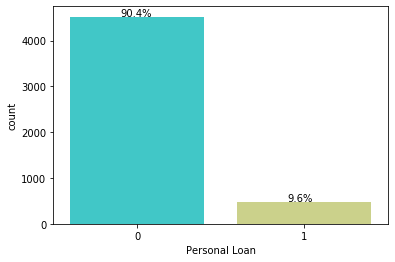

In [32]:
#To check the target is balanced or imbalanced
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data = data,x = "Personal Loan",palette = "rainbow")
plt.text(x = -0.1,y = data["Personal Loan"].value_counts()[0]+20,s = str(round((data["Personal Loan"].value_counts()[0])*100/(len(data)),2)) + "%")
plt.text(x = 0.9,y = data["Personal Loan"].value_counts()[1]+20,s = str(round((data["Personal Loan"].value_counts()[1])*100/(len(data)),2)) + "%")
plt.show();

The target(Personal Loan) datapoint class is imbalanced ,It contains the 90.4% percent of 0 and 9.6% of percent of 1. To make the class balaced ,we must make some of the duplicate rows which Personal Loan is 1 ,to make the data balanced

In [15]:
#making the duplicates rows
duplicate1 = data[data["Personal Loan"] == 1]
duplicate2 = duplicate1.copy()
duplicate3 = duplicate1.copy()
duplicate4 = duplicate1.copy()
duplicate5 = duplicate1.copy()

In [16]:
#concating both original and duplicate rows to make the target column balaned
fuu = pd.concat([data,duplicate1,duplicate2,duplicate3,duplicate4,duplicate5],ignore_index = True)
fuu.reset_index()

,index,ID,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Experience
0,0,1,25,49,91107,4,1.6,1,0,0,1,0,0,0,1.0
1,1,2,45,34,90089,3,1.5,1,0,0,1,0,0,0,19.0
2,2,3,39,11,94720,1,1.0,1,0,0,0,0,0,0,15.0
3,3,4,35,100,94112,1,2.7,2,0,0,0,0,0,0,9.0
4,4,5,35,45,91330,4,1.0,2,0,0,0,0,0,1,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7395,7395,4884,38,129,92646,3,4.1,3,0,1,0,1,1,1,13.0
7396,7396,4928,43,121,94720,1,0.7,2,0,1,0,1,1,1,19.0
7397,7397,4942,28,112,90049,2,1.6,2,0,1,0,0,1,0,4.0
7398,7398,4963,46,122,90065,3,3.0,3,0,1,0,1,1,1,20.0


In [17]:
#changing the dataset name 
data =fuu.copy()

In [36]:
data

,ID,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Experience
0,1,25,49,91107,4,1.6,1,0,0,1,0,0,0,1.0
1,2,45,34,90089,3,1.5,1,0,0,1,0,0,0,19.0
2,3,39,11,94720,1,1.0,1,0,0,0,0,0,0,15.0
3,4,35,100,94112,1,2.7,2,0,0,0,0,0,0,9.0
4,5,35,45,91330,4,1.0,2,0,0,0,0,0,1,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7395,4884,38,129,92646,3,4.1,3,0,1,0,1,1,1,13.0
7396,4928,43,121,94720,1,0.7,2,0,1,0,1,1,1,19.0
7397,4942,28,112,90049,2,1.6,2,0,1,0,0,1,0,4.0
7398,4963,46,122,90065,3,3.0,3,0,1,0,1,1,1,20.0


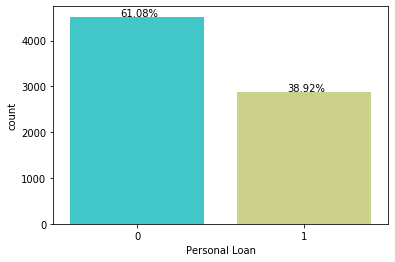

In [37]:
#checking the target variable after the making the data balanced
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data = fuu,x = "Personal Loan",palette = "rainbow")
plt.text(x = -0.1,y = fuu["Personal Loan"].value_counts()[0]+20,s = str(round((fuu["Personal Loan"].value_counts()[0])*100/(len(fuu)),2)) + "%")
plt.text(x = 0.9,y = fuu["Personal Loan"].value_counts()[1]+20,s = str(round((fuu["Personal Loan"].value_counts()[1])*100/(len(fuu)),2)) + "%")
plt.show();

In [18]:
#Checking the numerical and categorical
numerical = [col for col in data.columns if data[col].dtypes != object]
categorical = [col for col in data.columns if data[col].dtypes == object]

In [40]:
print(numerical)

['ID', 'Age', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Experience']


In [43]:
categorical

[]

In [48]:
#checking the count of the unique values
data["ZIP Code"].value_counts()

94720    264
94305    192
95616    146
90095    111
92093     96
        ... 
90813      1
92694      1
94404      1
94087      1
94970      1
Name: ZIP Code, Length: 467, dtype: int64

In [50]:
#checking the count of the unique values
data["ZIP Code"].unique().shape

(467,)

In [52]:
#checking the count of the unique values
data['Education'].value_counts()

1    2561
3    2526
2    2313
Name: Education, dtype: int64

In [19]:
#changing the Education dtype(int) into categorical
data["Education"] = data['Education'].replace({1:"Undergrad", 2: "Graduate", 3:"Professional"})

In [59]:
#checking the count of the unique values
data['Education'].value_counts()

Undergrad       2559
Professional    2526
Graduate        2312
Name: Education, dtype: int64

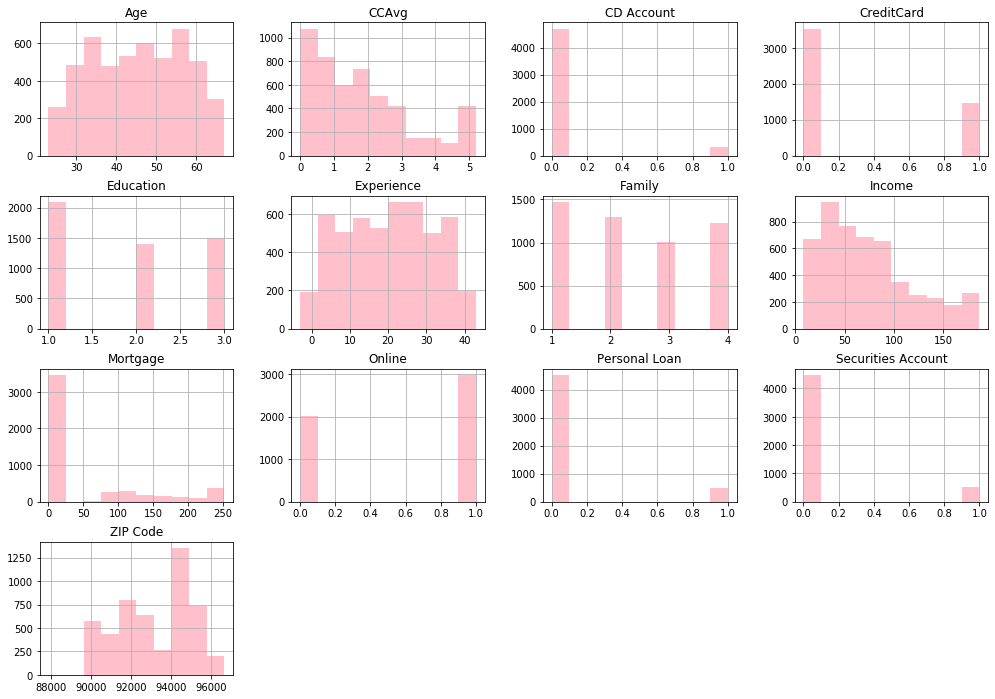

In [8]:
# PLotting Histogram for whole dataset using hist()
import matplotlib.pyplot as plt
import seaborn as sns
data.hist(figsize=(17,12),color='Pink')
plt.show();


In [29]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [32]:
#checking the count of the unique
data["ZIP Code"].unique().shape

(467,)

In [20]:
#Droping the column name : "ID" which is not very usefull in predicting the values
data.drop(["ID"],axis =1,inplace =True)

In [34]:
data

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


# Checking for the outliers

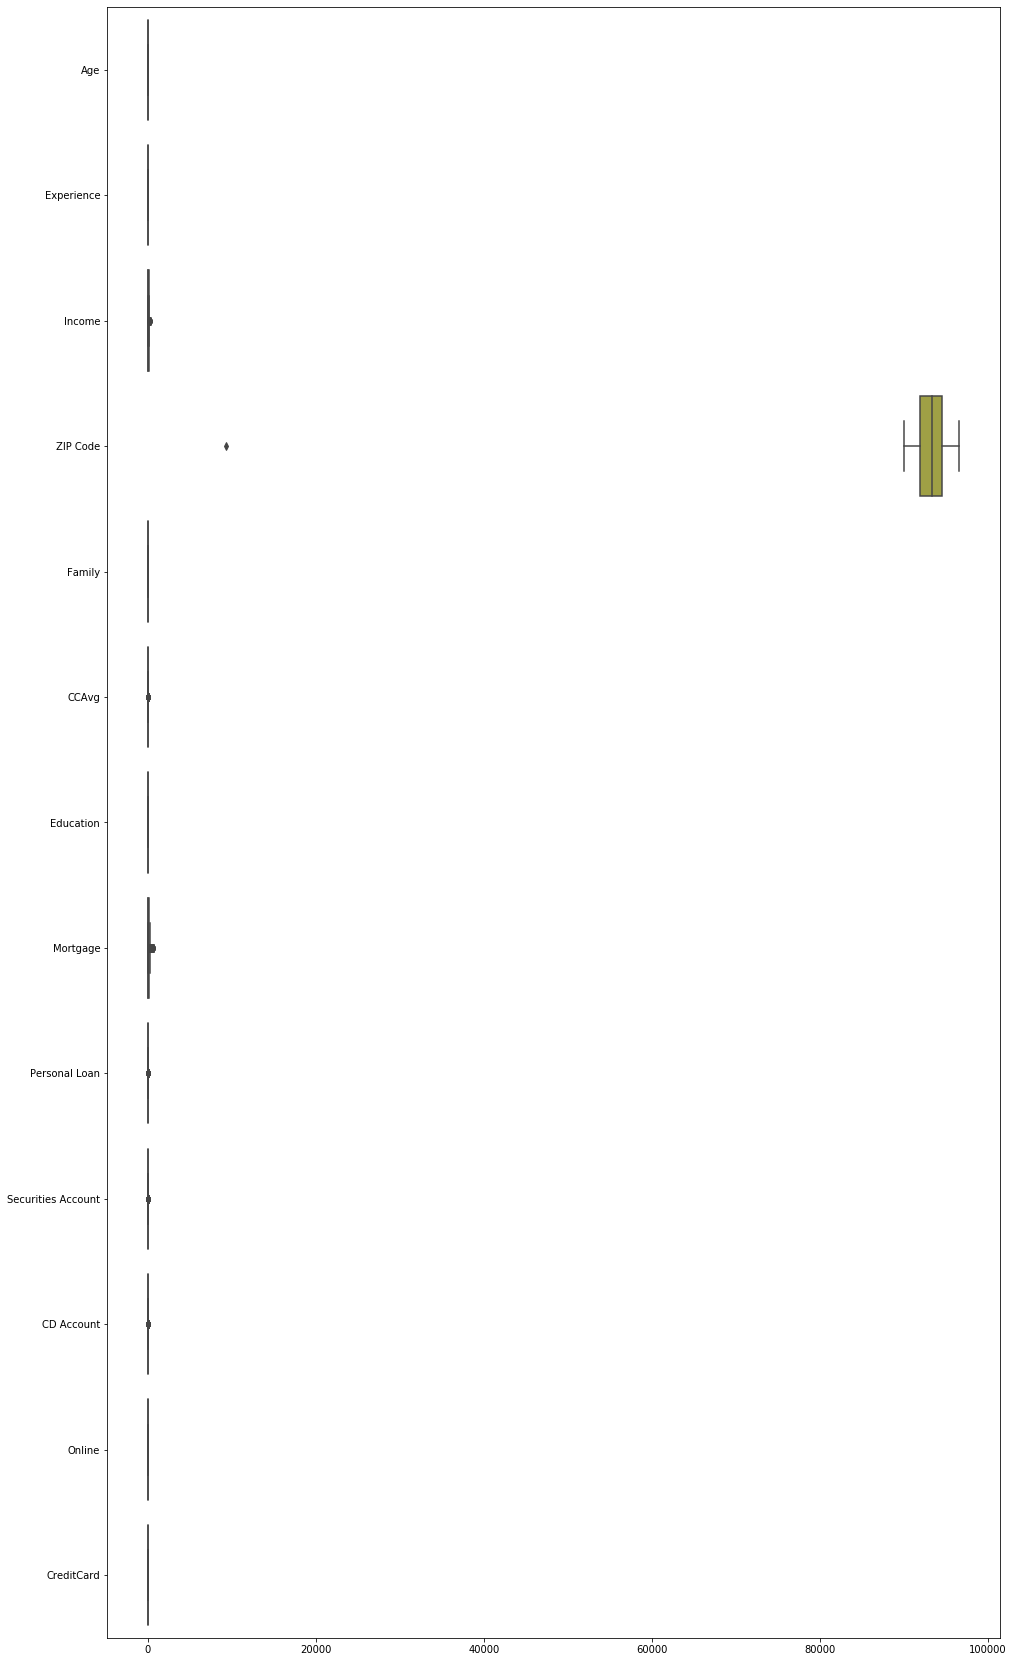

In [36]:
#checking the outliers by using the boxplot
plt.figure(figsize = (16,30))
sns.boxplot(data = data,orient ="h");

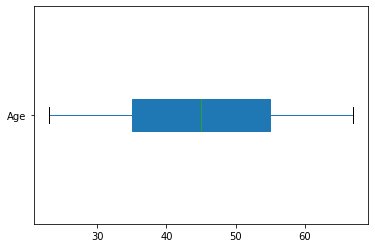

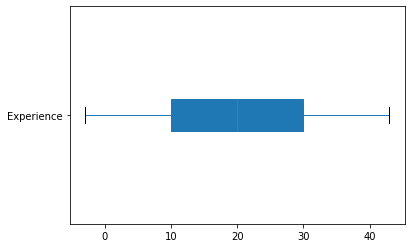

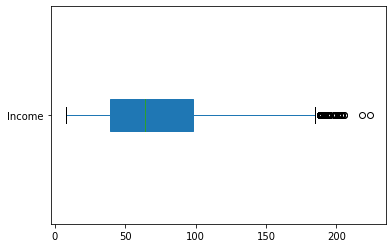

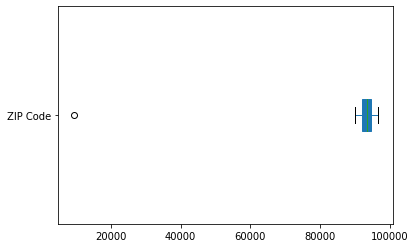

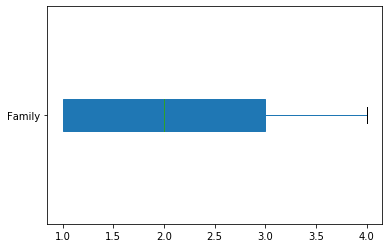

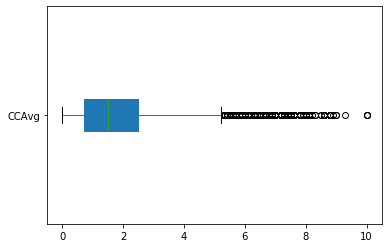

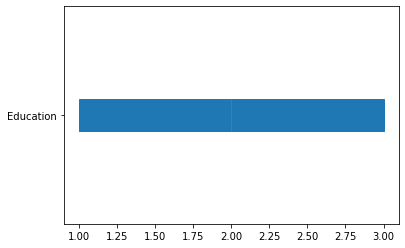

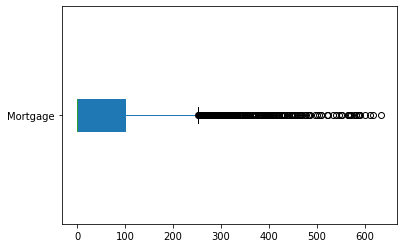

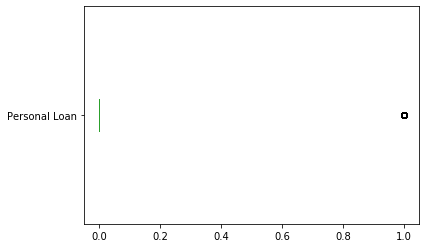

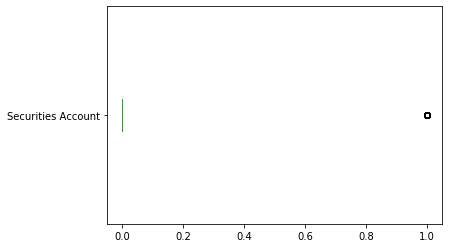

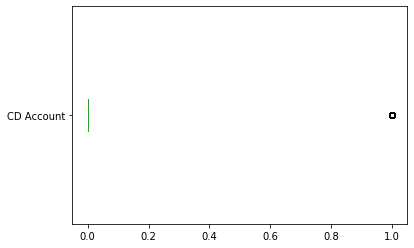

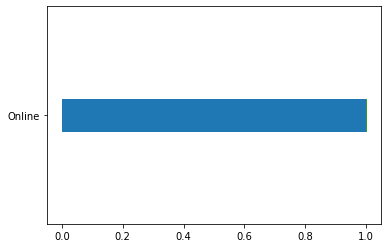

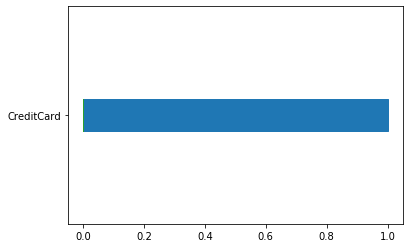

In [37]:
#checking the outliers by using the boxplot 
for col in data.columns:
    data[col].plot.box(patch_artist = True,vert =False)
    plt.show();

In [38]:
#checking the column names in dataset
data.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [43]:
#checking the count of the unique values
data["Securities Account"].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [44]:
#checking the count of the unique values
data["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [45]:
#checking the count of the unique values
data["CD Account"].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

# Removing the outliers for the data of  ("Income","ZIP Code","CCAvg","Mortgage" ) by using the IQR method

In [21]:
outlier_col = ["Income","ZIP Code","CCAvg","Mortgage"]
for i in data[outlier_col]:
    Q1 = data[i].quantile(q  = 0.25)
    Q3 = data[i].quantile(q = 0.75)

    IQR = Q3 -Q1

    lowerbound = Q1 - (1.5*IQR)
    upperbound = Q3 + (1.5*IQR)

    data[i] = np.where(data[i] < lowerbound,lowerbound,data[i])
    data[i] = np.where(data[i] > upperbound,upperbound,data[i])
    

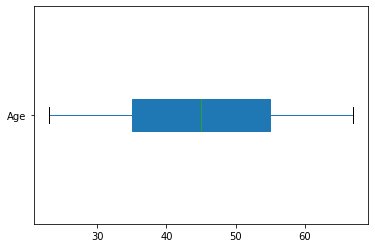

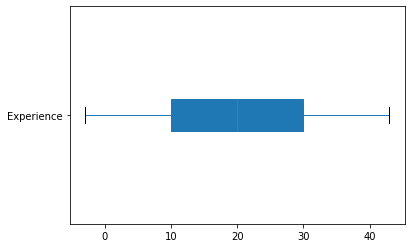

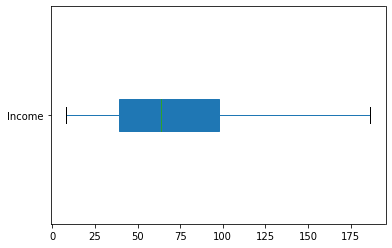

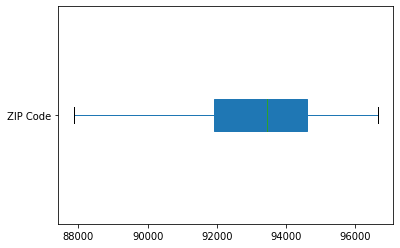

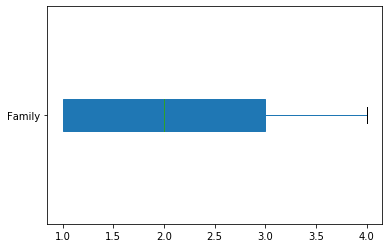

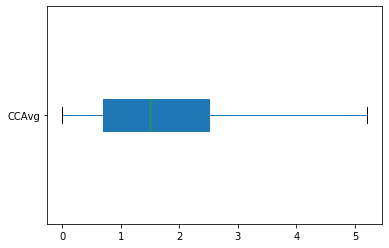

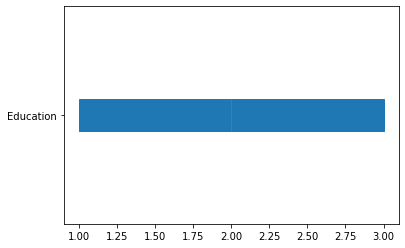

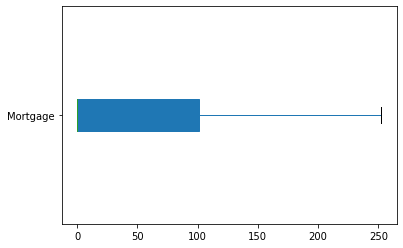

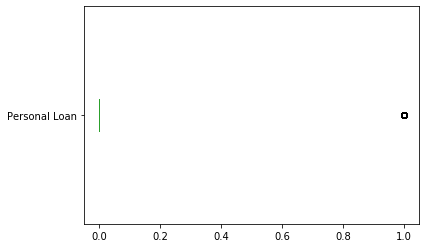

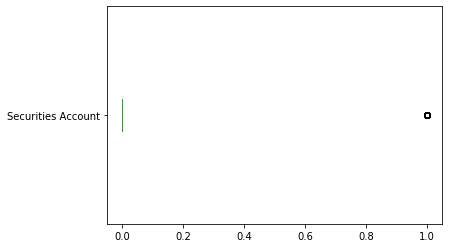

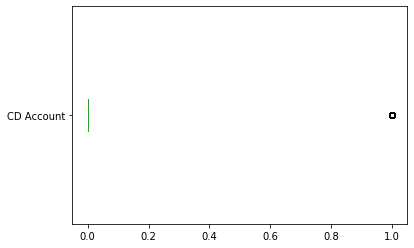

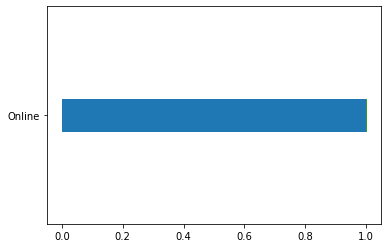

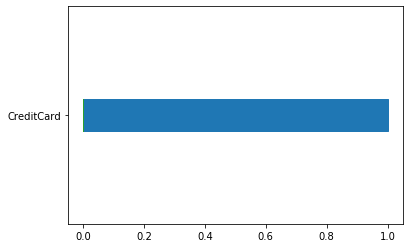

In [9]:
#Viewing the columns after removing the outliers 
for col in data.columns:
    data[col].plot.box(patch_artist = True,vert =False)
    plt.show();

# UNIVARIATE ANALYSIS

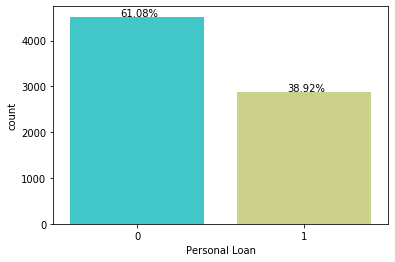

In [22]:
sns.countplot(data = data,x = "Personal Loan",palette = "rainbow")
plt.text(x = -0.1,y = data["Personal Loan"].value_counts()[0]+20,s = str(round((data["Personal Loan"].value_counts()[0])*100/(len(data)),2)) + "%")
plt.text(x = 0.9,y = data["Personal Loan"].value_counts()[1]+20,s = str(round((data["Personal Loan"].value_counts()[1])*100/(len(data)),2)) + "%")
plt.show();

In [43]:
data["Age"].unique().shape

(45,)

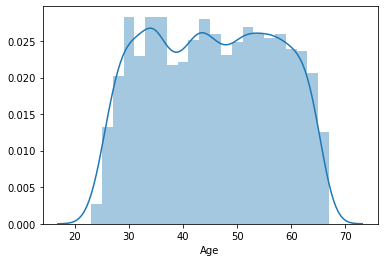

In [23]:
sns.distplot(data["Age"]);

In [42]:
data["Experience"].unique().shape

(54,)

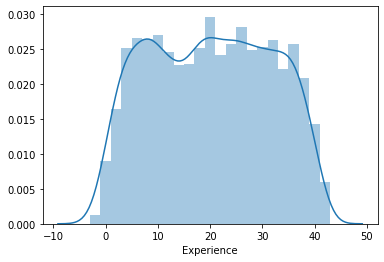

In [24]:
sns.distplot(data["Experience"]);

In [41]:
data["Income"].unique().shape

(162,)

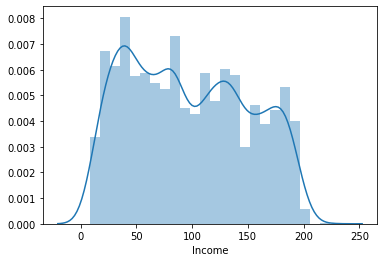

In [25]:
sns.distplot(data["Income"]);

In [40]:
data["ZIP Code"].unique().shape

(467,)

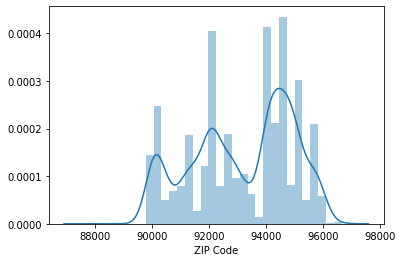

In [26]:
sns.distplot(data["ZIP Code"]);

In [39]:
data["Family"].value_counts()

1    2007
4    1892
2    1826
3    1675
Name: Family, dtype: int64

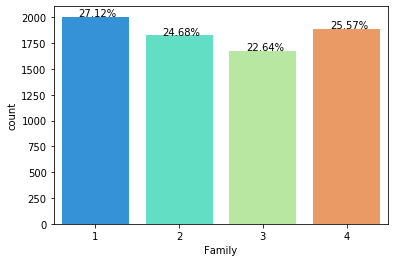

In [27]:
sns.countplot(data = data,x = "Family",palette = "rainbow")
plt.text(x = -0.2,y = data["Family"].value_counts()[1]+7,s = str(round((data["Family"].value_counts()[1])*100/(len(data)),2)) + "%")
plt.text(x = 0.8,y = data["Family"].value_counts()[2]+7,s = str(round((data["Family"].value_counts()[2])*100/(len(data)),2)) + "%")
plt.text(x = 1.8,y = data["Family"].value_counts()[3]+7,s = str(round((data["Family"].value_counts()[3])*100/(len(data)),2)) + "%")
plt.text(x = 2.8,y = data["Family"].value_counts()[4]+7,s = str(round((data["Family"].value_counts()[4])*100/(len(data)),2)) + "%")
plt.show();

In [38]:
data["CCAvg"].unique()

array([1.6 , 1.5 , 1.  , 2.7 , 0.4 , 0.3 , 0.6 , 8.15, 2.4 , 0.1 , 3.8 ,
       2.5 , 2.  , 4.7 , 8.1 , 0.5 , 0.9 , 1.2 , 0.7 , 3.9 , 0.2 , 2.2 ,
       3.3 , 1.8 , 2.9 , 1.4 , 5.  , 2.3 , 1.1 , 5.7 , 4.5 , 2.1 , 8.  ,
       1.7 , 0.  , 2.8 , 3.5 , 4.  , 2.6 , 1.3 , 5.6 , 5.2 , 3.  , 4.6 ,
       3.6 , 7.2 , 1.75, 7.4 , 2.67, 7.5 , 6.5 , 7.8 , 7.9 , 4.1 , 1.9 ,
       4.3 , 6.8 , 5.1 , 3.1 , 0.8 , 3.7 , 6.2 , 0.75, 2.33, 4.9 , 0.67,
       3.2 , 5.5 , 6.9 , 4.33, 7.3 , 4.2 , 4.4 , 6.1 , 6.33, 6.6 , 5.3 ,
       3.4 , 7.  , 6.3 , 6.  , 1.67, 7.6 , 6.4 , 5.9 , 5.4 , 1.33, 6.7 ,
       4.25, 6.67, 5.8 , 4.8 , 3.25, 5.67, 4.75, 4.67, 3.67, 3.33, 5.33,
       2.75])

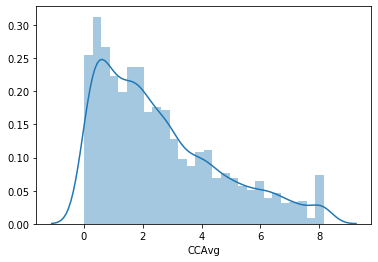

In [28]:
sns.distplot(data["CCAvg"]);

In [37]:
data["Education"].value_counts()

Undergrad       2561
Professional    2526
Graduate        2313
Name: Education, dtype: int64

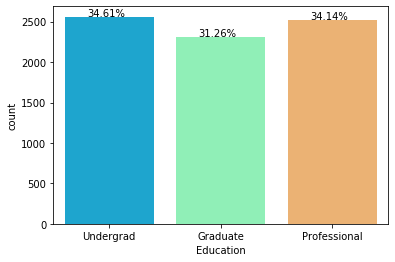

In [29]:
sns.countplot(data = data,x = "Education",palette = "rainbow")
plt.text(x = -0.2,y = data["Education"].value_counts()[0]+7,s = str(round((data["Education"].value_counts()[0])*100/(len(data)),2)) + "%")
plt.text(x = 0.8,y = data["Education"].value_counts()[2]+7,s = str(round((data["Education"].value_counts()[2])*100/(len(data)),2)) + "%")
plt.text(x = 1.8,y = data["Education"].value_counts()[1]+7,s = str(round((data["Education"].value_counts()[1])*100/(len(data)),2)) + "%")
plt.show();

In [36]:
data["Mortgage"].unique().shape

(210,)

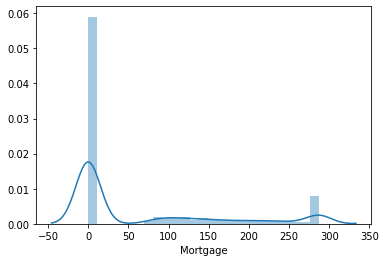

In [30]:
sns.distplot(data["Mortgage"]);

In [35]:
data["Securities Account"].unique().shape

(2,)

In [34]:
data["Securities Account"].value_counts()

0    6578
1     822
Name: Securities Account, dtype: int64

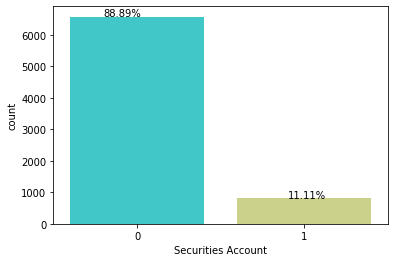

In [31]:
sns.countplot(data =data,x ="Securities Account",palette = "rainbow");
plt.text(x = -0.2,y = data["Securities Account"].value_counts()[0]+7,s = str(round((data["Securities Account"].value_counts()[0])*100/(len(data)),2)) + "%")
plt.text(x = 0.9,y = data["Securities Account"].value_counts()[1]+7,s = str(round((data["Securities Account"].value_counts()[1])*100/(len(data)),2)) + "%")
plt.show();

In [33]:
data["CD Account"].value_counts()

0    6398
1    1002
Name: CD Account, dtype: int64

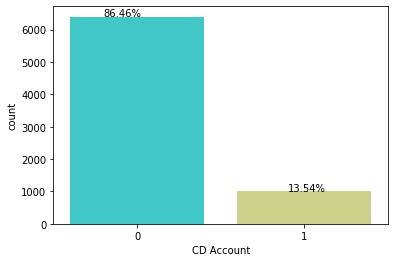

In [45]:
sns.countplot(data =data,x ="CD Account",palette = "rainbow");
plt.text(x = -0.2,y = data["CD Account"].value_counts()[0]+7,s = str(round((data["CD Account"].value_counts()[0])*100/(len(data)),2)) + "%")
plt.text(x = 0.9,y = data["CD Account"].value_counts()[1]+7,s = str(round((data["CD Account"].value_counts()[1])*100/(len(data)),2)) + "%")
plt.show();

In [44]:
data["Online"].value_counts()

1    4439
0    2961
Name: Online, dtype: int64

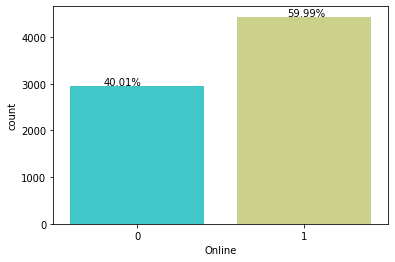

In [46]:
sns.countplot(data =data,x ="Online",palette = "rainbow");
plt.text(x = -0.2,y = data["Online"].value_counts()[0]+7,s = str(round((data["Online"].value_counts()[0])*100/(len(data)),2)) + "%")
plt.text(x = 0.9,y = data["Online"].value_counts()[1]+7,s = str(round((data["Online"].value_counts()[1])*100/(len(data)),2)) + "%")
plt.show();

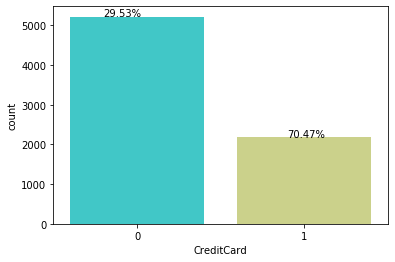

In [47]:
sns.countplot(data =data,x ="CreditCard",palette = "rainbow");
plt.text(x = -0.2,y = data["CreditCard"].value_counts()[0]+7,s = str(round((data["CreditCard"].value_counts()[1])*100/(len(data)),2)) + "%")
plt.text(x = 0.9,y = data["CreditCard"].value_counts()[1]+7,s = str(round((data["CreditCard"].value_counts()[0])*100/(len(data)),2)) + "%")
plt.show();

# BIVARIATE ANALYSIS

In [10]:
data.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

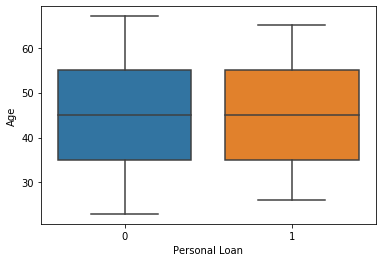

In [48]:
sns.boxplot(x = data["Personal Loan"],y = data["Age"]);

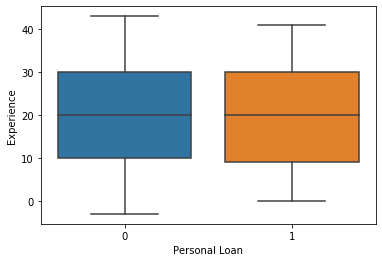

In [49]:
sns.boxplot(x = data['Personal Loan'],y = data["Experience"]);

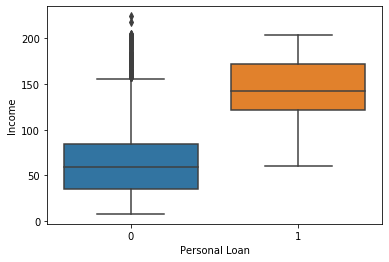

In [50]:
sns.boxplot(x = data['Personal Loan'],y = data["Income"]);

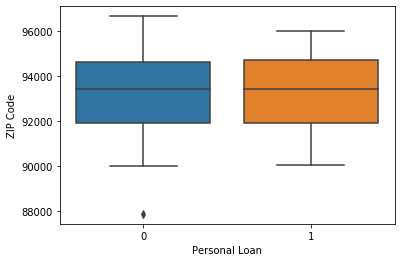

In [51]:
sns.boxplot(x = data['Personal Loan'],y = data["ZIP Code"]);

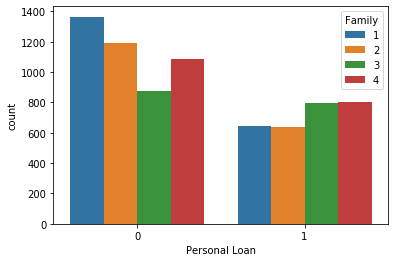

In [52]:
sns.countplot(data["Personal Loan"],hue = data["Family"]);

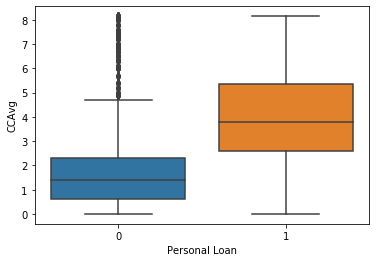

In [53]:
sns.boxplot(x = data['Personal Loan'],y = data["CCAvg"]);

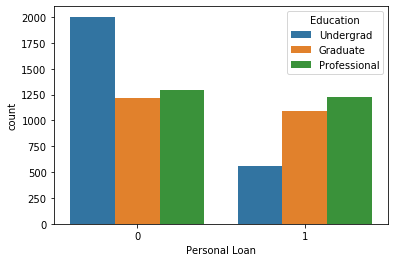

In [54]:
sns.countplot(data["Personal Loan"],hue = data["Education"]);

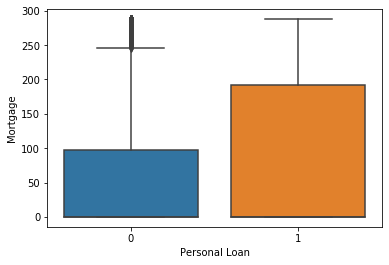

In [55]:
sns.boxplot(x = data['Personal Loan'],y = data["Mortgage"]);

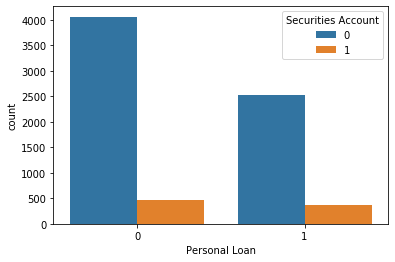

In [56]:
sns.countplot(data["Personal Loan"],hue = data["Securities Account"]);

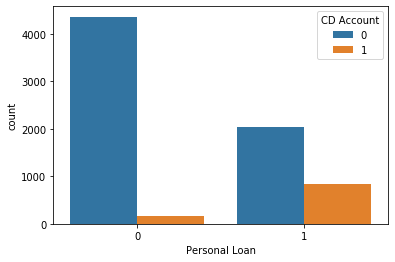

In [57]:
sns.countplot(data["Personal Loan"],hue = data["CD Account"]);

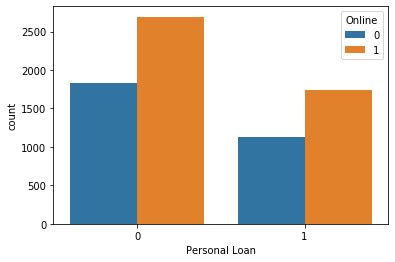

In [58]:
sns.countplot(data["Personal Loan"],hue = data["Online"]);

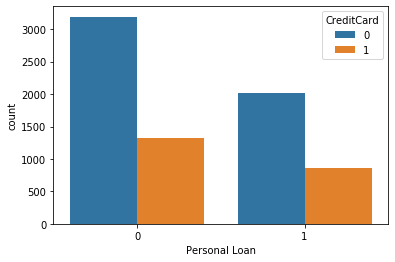

In [59]:
sns.countplot(data["Personal Loan"],hue = data["CreditCard"]);

# MULTI VARIATE ANALYSIS

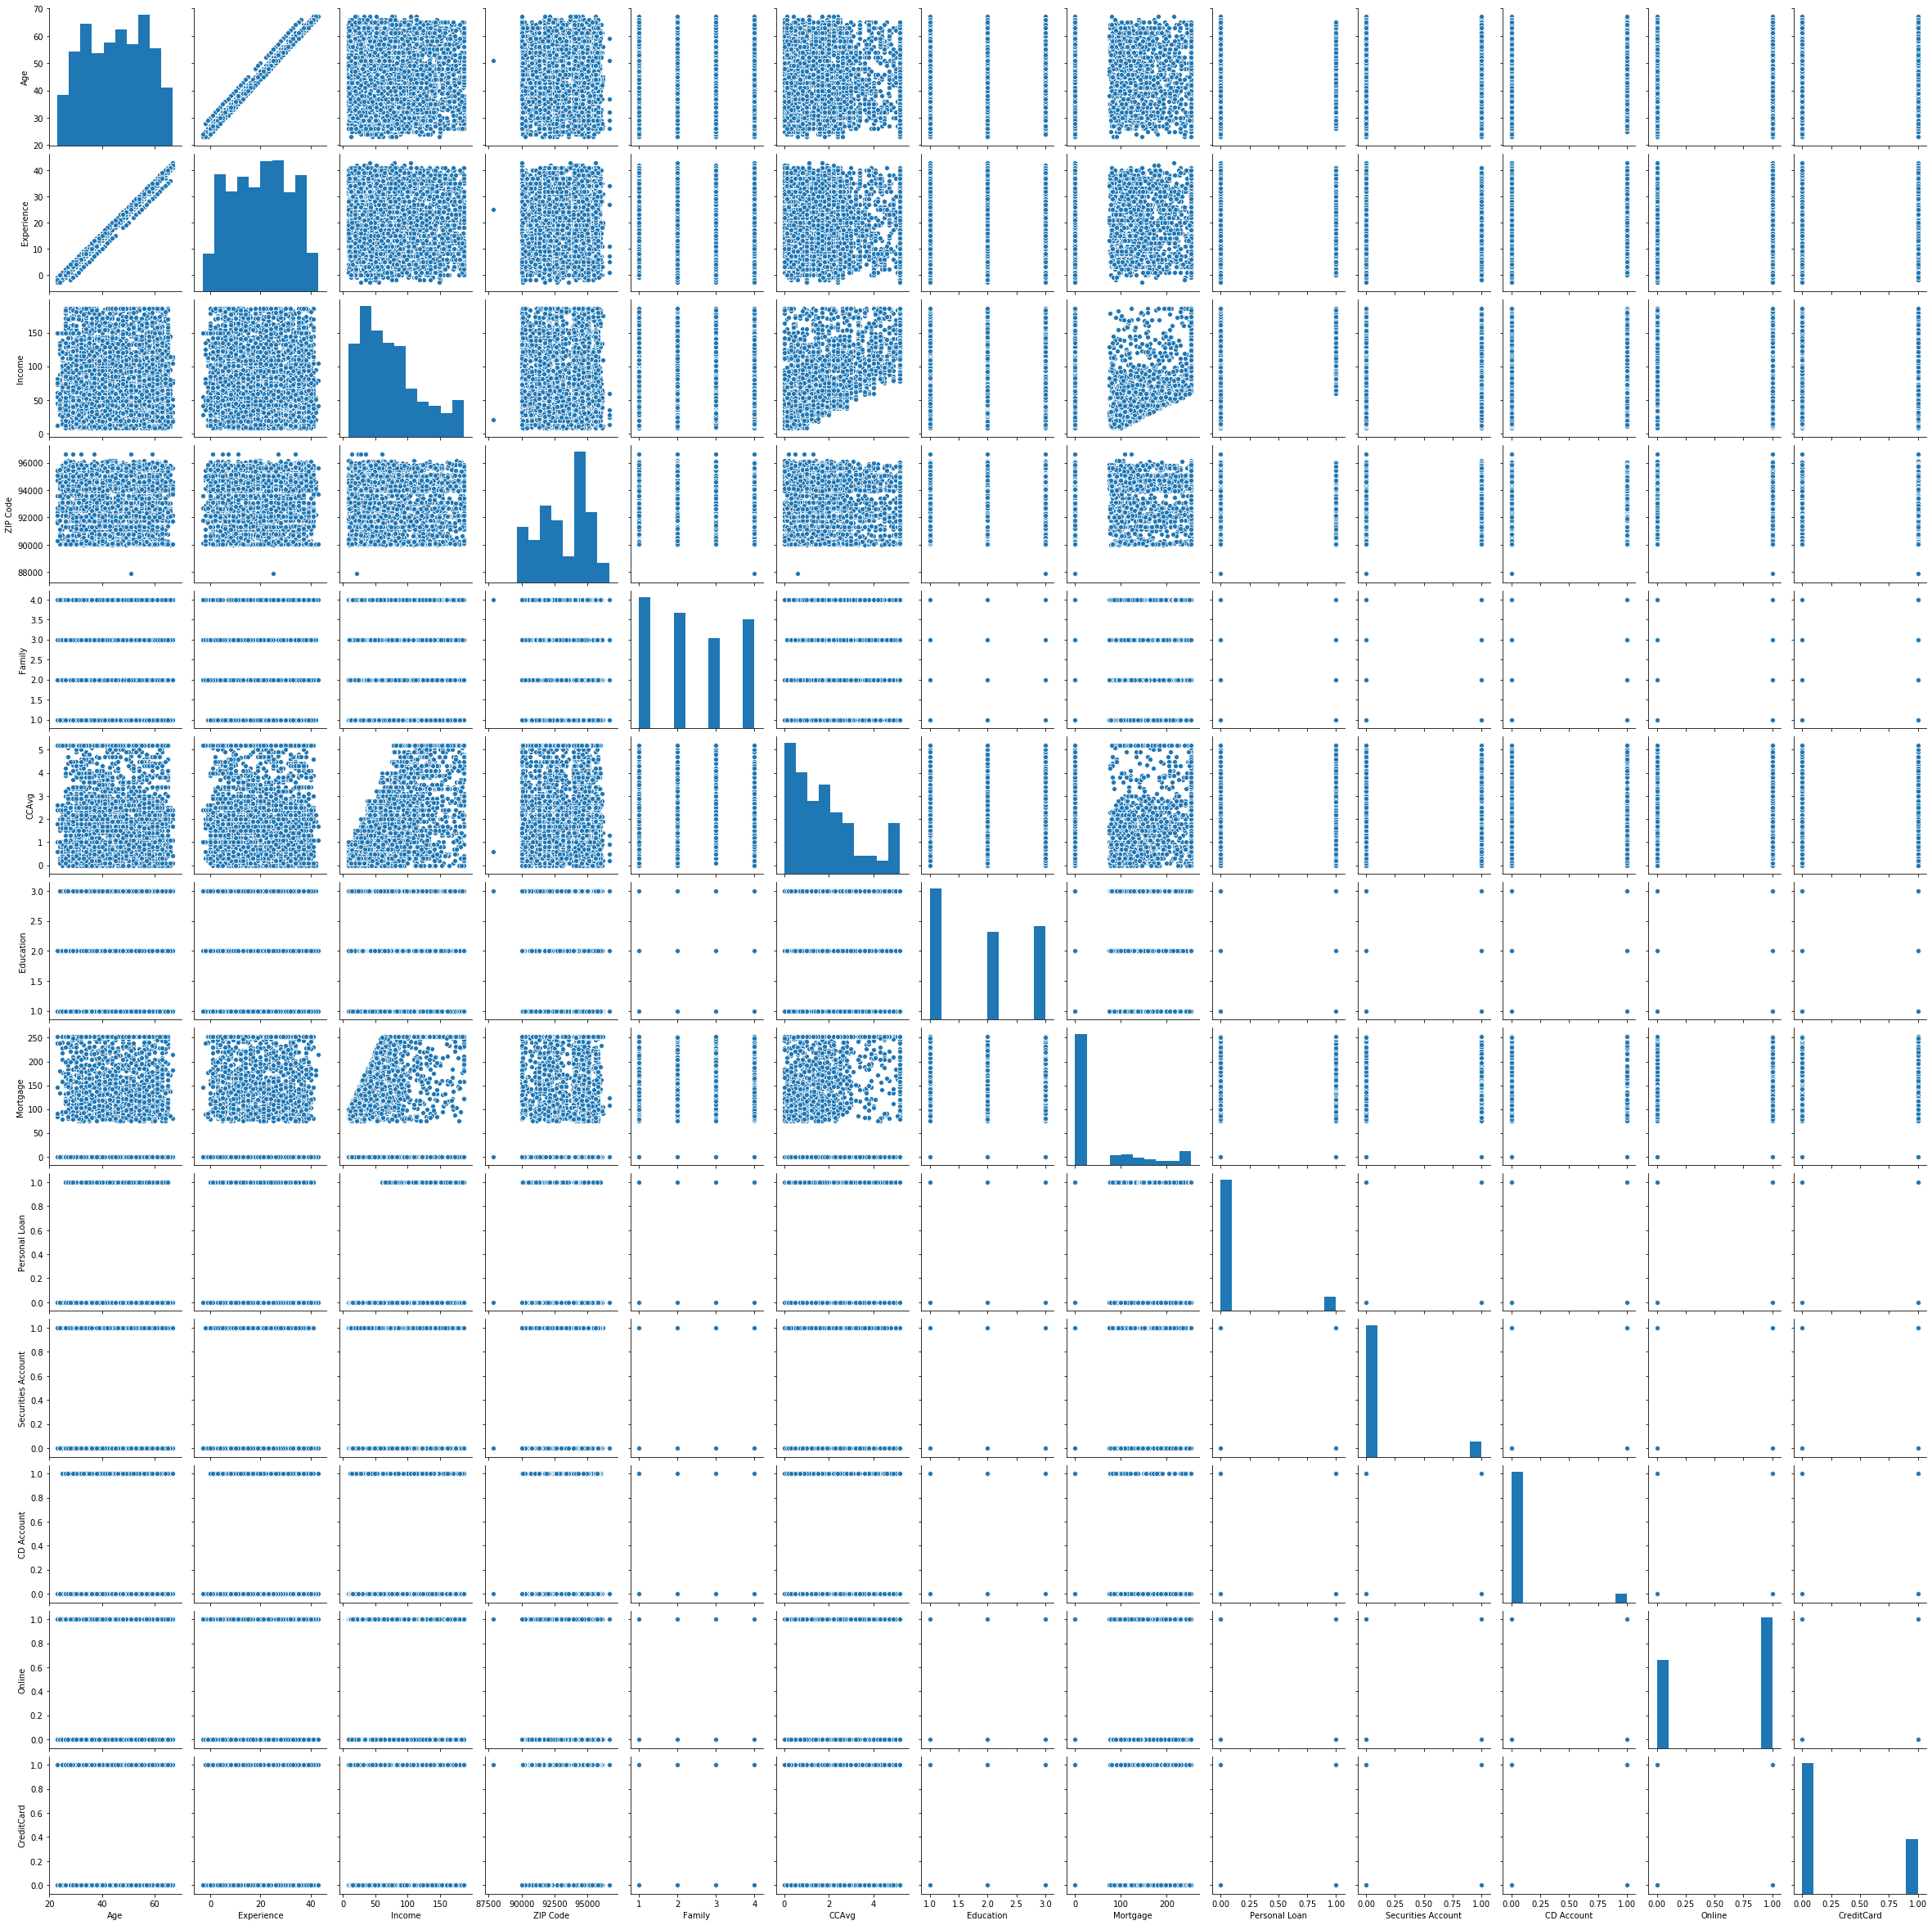

In [38]:
sns.pairplot(data);

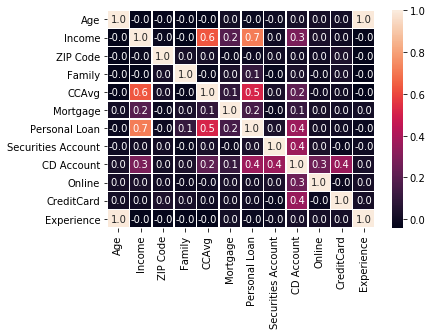

In [60]:
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f');

In [61]:
data["Mortgage"].value_counts()

0.0      5022
287.5     633
106.0      23
120.0      22
115.0      21
         ... 
191.0       1
286.0       1
235.0       1
265.0       1
283.0       1
Name: Mortgage, Length: 210, dtype: int64

In [43]:
data

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49.0,91107.0,4,1.6,1,0.0,0,1,0,0,0
1,45,19,34.0,90089.0,3,1.5,1,0.0,0,1,0,0,0
2,39,15,11.0,94720.0,1,1.0,1,0.0,0,0,0,0,0
3,35,9,100.0,94112.0,1,2.7,2,0.0,0,0,0,0,0
4,35,8,45.0,91330.0,4,1.0,2,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40.0,92697.0,1,1.9,3,0.0,0,0,0,1,0
4996,30,4,15.0,92037.0,4,0.4,1,85.0,0,0,0,1,0
4997,63,39,24.0,93023.0,2,0.3,3,0.0,0,0,0,0,0
4998,65,40,49.0,90034.0,3,0.5,2,0.0,0,0,0,1,0


In [62]:
columns = ["Age","Experience","Income","ZIP Code","Mortgage"]
data[columns]

,Age,Experience,Income,ZIP Code,Mortgage
0,25,1.0,49.0,91107.0,0.0
1,45,19.0,34.0,90089.0,0.0
2,39,15.0,11.0,94720.0,0.0
3,35,9.0,100.0,94112.0,0.0
4,35,8.0,45.0,91330.0,0.0
...,...,...,...,...,...
7395,38,13.0,129.0,92646.0,0.0
7396,43,19.0,121.0,94720.0,0.0
7397,28,4.0,112.0,90049.0,0.0
7398,46,20.0,122.0,90065.0,0.0


# Normalization

There is no outliers .so that we can do the Normalization

Normalization refers to rescaling real-valued numeric attributes into a 0 to 1 range. Normalization makes the features more consistent with each other, which allows the model to predict outputs more accurately.

In [63]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

In [64]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data[columns])

In [65]:
normalization = pd.DataFrame(scaled)
normalization

,0,1,2,3,4
0,0.045455,0.086957,0.189815,0.369176,0.0
1,0.500000,0.478261,0.120370,0.253342,0.0
2,0.363636,0.391304,0.013889,0.780281,0.0
3,0.272727,0.260870,0.425926,0.711100,0.0
4,0.272727,0.239130,0.171296,0.394550,0.0
...,...,...,...,...,...
7395,0.340909,0.347826,0.560185,0.544291,0.0
7396,0.454545,0.478261,0.523148,0.780281,0.0
7397,0.113636,0.152174,0.481481,0.248791,0.0
7398,0.522727,0.500000,0.527778,0.250612,0.0


In [66]:
#Rename the column name with original column name 
normalization = normalization.rename(columns = {0:"Age",1:"Experience",2:"Income",3:"ZIP Code",4:"Mortgage"})

In [67]:
#viewing the normalized data
normalization

,Age,Experience,Income,ZIP Code,Mortgage
0,0.045455,0.086957,0.189815,0.369176,0.0
1,0.500000,0.478261,0.120370,0.253342,0.0
2,0.363636,0.391304,0.013889,0.780281,0.0
3,0.272727,0.260870,0.425926,0.711100,0.0
4,0.272727,0.239130,0.171296,0.394550,0.0
...,...,...,...,...,...
7395,0.340909,0.347826,0.560185,0.544291,0.0
7396,0.454545,0.478261,0.523148,0.780281,0.0
7397,0.113636,0.152174,0.481481,0.248791,0.0
7398,0.522727,0.500000,0.527778,0.250612,0.0


In [68]:
#droping the columns
data.drop(["Age","Experience","Income","ZIP Code","Mortgage"],axis = 1,inplace =True)

In [61]:
data

,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,4,1.6,Undergrad,0,1,0,0,0
1,3,1.5,Undergrad,0,1,0,0,0
2,1,1.0,Undergrad,0,0,0,0,0
3,1,2.7,Graduate,0,0,0,0,0
4,4,1.0,Graduate,0,0,0,0,1
...,...,...,...,...,...,...,...,...
7395,3,4.1,Professional,1,0,1,1,1
7396,1,0.7,Graduate,1,0,1,1,1
7397,2,1.6,Graduate,1,0,0,1,0
7398,3,3.0,Professional,1,0,1,1,1


In [69]:
#concating the normalized numerical data with the raw data
fullraw = pd.concat([normalization,data],axis = 1)

In [63]:
fullraw

,Age,Experience,Income,ZIP Code,Mortgage,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0.045455,0.086957,0.189815,0.369176,0.0,4,1.6,Undergrad,0,1,0,0,0
1,0.500000,0.478261,0.120370,0.253342,0.0,3,1.5,Undergrad,0,1,0,0,0
2,0.363636,0.391304,0.013889,0.780281,0.0,1,1.0,Undergrad,0,0,0,0,0
3,0.272727,0.260870,0.425926,0.711100,0.0,1,2.7,Graduate,0,0,0,0,0
4,0.272727,0.239130,0.171296,0.394550,0.0,4,1.0,Graduate,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7395,0.340909,0.347826,0.560185,0.544291,0.0,3,4.1,Professional,1,0,1,1,1
7396,0.454545,0.478261,0.523148,0.780281,0.0,1,0.7,Graduate,1,0,1,1,1
7397,0.113636,0.152174,0.481481,0.248791,0.0,2,1.6,Graduate,1,0,0,1,0
7398,0.522727,0.500000,0.527778,0.250612,0.0,3,3.0,Professional,1,0,1,1,1


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Family              7400 non-null   int64  
 1   CCAvg               7400 non-null   float64
 2   Education           7400 non-null   object 
 3   Personal Loan       7400 non-null   int64  
 4   Securities Account  7400 non-null   int64  
 5   CD Account          7400 non-null   int64  
 6   Online              7400 non-null   int64  
 7   CreditCard          7400 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 462.6+ KB


In [71]:
#changing the CreditCard dtype(int) into categorical
fullraw["CreditCard"].replace({0:"No",1:"Yes"},inplace =True)

In [72]:
#changing the CD Account dtype(int) into categorical
fullraw["CD Account"].replace({0:"No",1:"Yes"},inplace =True)

In [73]:
#changing the online dtype(int) into categorical
fullraw["Online"].replace({0:"No",1:"Yes"},inplace =True)

In [74]:
#changing the Securities Account dtype(int) into categorical
fullraw["Securities Account"].replace({0:"No",1:"Yes"},inplace =True)

# Dummy variable Creation(One-Hot-Encoding)

In [75]:
# Lets create dummy variables out of the categorical variables
fullraw = pd.get_dummies(fullraw)

In [76]:
fullraw

,Age,Experience,Income,ZIP Code,Mortgage,Family,CCAvg,Personal Loan,Education_Graduate,Education_Professional,Education_Undergrad,Securities Account_No,Securities Account_Yes,CD Account_No,CD Account_Yes,Online_No,Online_Yes,CreditCard_No,CreditCard_Yes
0,0.045455,0.086957,0.189815,0.369176,0.0,4,1.6,0,0,0,1,0,1,1,0,1,0,1,0
1,0.500000,0.478261,0.120370,0.253342,0.0,3,1.5,0,0,0,1,0,1,1,0,1,0,1,0
2,0.363636,0.391304,0.013889,0.780281,0.0,1,1.0,0,0,0,1,1,0,1,0,1,0,1,0
3,0.272727,0.260870,0.425926,0.711100,0.0,1,2.7,0,1,0,0,1,0,1,0,1,0,1,0
4,0.272727,0.239130,0.171296,0.394550,0.0,4,1.0,0,1,0,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7395,0.340909,0.347826,0.560185,0.544291,0.0,3,4.1,1,0,1,0,1,0,0,1,0,1,0,1
7396,0.454545,0.478261,0.523148,0.780281,0.0,1,0.7,1,1,0,0,1,0,0,1,0,1,0,1
7397,0.113636,0.152174,0.481481,0.248791,0.0,2,1.6,1,1,0,0,1,0,1,0,0,1,1,0
7398,0.522727,0.500000,0.527778,0.250612,0.0,3,3.0,1,0,1,0,1,0,0,1,0,1,0,1


# TRAIN TEST SPLIT

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
#X is the target(dependent) variable
#y is the features(Independent) variable 
X = fullraw.drop('Personal Loan',axis=1)
y = fullraw['Personal Loan']

In [79]:
#Extract independent variables (Xs) and dependent variables (Ys) into separate data objects
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state = 100)

In [72]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5180, 18)
(2220, 18)
(5180,)
(2220,)


# Variance Inflation Factor (VIF)

Check for Multicollinearity VIF is usually a little relaxed compared to linear regression (as the impact of multicollinearity reduces due to the non-linearity the logistic/sigmoid function brings). So, VIF threshold is usually kept at 10

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
tempMaxVIF = 10
maxVIF = 10
trainXCopy = X_train.copy()
counter = 1
highVIFColumnNames = []

while (tempMaxVIF >= maxVIF):
    
    tempVIFDf = pd.DataFrame() 
  
    tempVIFDf['VIF'] = [variance_inflation_factor(trainXCopy.values, i) for i in range(trainXCopy.shape[1])]
    
    tempVIFDf['Column_Name'] = trainXCopy.columns
    
    tempVIFDf.dropna(inplace=True)
    
    tempColumnName = tempVIFDf.sort_values(["VIF"])[-1:]["Column_Name"].values[0]
    
    tempMaxVIF = tempVIFDf.sort_values(["VIF"])[-1:]["VIF"].values[0]
    
    if (tempMaxVIF >= maxVIF):
        
        print(counter)
        print(tempColumnName)
        

        trainXCopy = trainXCopy.drop(tempColumnName, axis = 1)    
        highVIFColumnNames.append(tempColumnName)
    
    counter = counter + 1


C:\Users\GOJIRAH\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


1
CreditCard_Yes
2
Education_Professional
3
Online_Yes
4
CD Account_Yes
5
Age
6
Securities Account_No


In [75]:
#viewing high VIF columns
highVIFColumnNames

['CreditCard_Yes',
 'Education_Professional',
 'Online_Yes',
 'CD Account_Yes',
 'Age',
 'Securities Account_No']

In [67]:
X_train.columns

Index(['Age', 'Income', 'ZIP Code', 'Mortgage', 'Family', 'CCAvg', 'Education',
       'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [68]:
X_test.columns

Index(['Age', 'Income', 'ZIP Code', 'Mortgage', 'Family', 'CCAvg', 'Education',
       'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [76]:
# Lets drop all the insignificant columns (based on highVIf) from the train and test datasets

X_train = X_train.drop(highVIFColumnNames, axis = 1)
X_test = X_test.drop(highVIFColumnNames, axis = 1)

print(X_train.shape)
print(X_test.shape)

(5180, 12)
(2220, 12)


Removing the PValue less than 0.05

In [77]:
from statsmodels.api import Logit
#We will use a for loop and discard indep variables based on "p-value"
# The concept of the for loop will remain very similar to VIF loop.

tempMaxPValue = 0.05
maxPValue = 0.05
trainXCopy = X_train.copy()
counter = 1
highPValueColumnNames = []


while (tempMaxPValue >= maxPValue):
    
    tempModelDf = pd.DataFrame()    
    Model = Logit(y_train, trainXCopy).fit()
    tempModelDf['PValue'] = Model.pvalues
    tempModelDf['Column_Name'] = trainXCopy.columns
    tempModelDf.dropna(inplace=True) # If there is some calculation error resulting in NAs
    tempColumnName = tempModelDf.sort_values(["PValue"])[-1:]["Column_Name"].values[0]
    tempMaxPValue = tempModelDf.sort_values(["PValue"])[-1:]["PValue"].values[0]
    
    if (tempMaxPValue >= maxPValue): # This condition will ensure that ONLY columns having p-value lower than 0.05 are NOT dropped
        print(tempColumnName, tempMaxPValue)    
        trainXCopy = trainXCopy.drop(tempColumnName, axis = 1)    
        highPValueColumnNames.append(tempColumnName)
    
    counter = counter + 1

print(highPValueColumnNames)

Optimization terminated successfully.
         Current function value: 0.246607
         Iterations 8
Mortgage 0.239562386581036
Optimization terminated successfully.
         Current function value: 0.246740
         Iterations 8
['Mortgage']


In [78]:
highPValueColumnNames

['Mortgage']

In [79]:
# Lets drop all the insignificant columns (based on pvalues) from the train and test datasets

X_train = X_train.drop(highPValueColumnNames, axis = 1)
X_test = X_test.drop(highPValueColumnNames, axis = 1)

print(X_train.shape)
print(X_test.shape)

(5180, 11)
(2220, 11)


# Model Building

# Logestic Regression

In [82]:
M1 = Logit(y_train, X_train).fit()
M1.summary() 

Optimization terminated successfully.
         Current function value: 0.246740
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5180
Model:                          Logit   Df Residuals:                     5169
Method:                           MLE   Df Model:                           10
Date:                Sun, 28 Nov 2021   Pseudo R-squ.:                  0.6296
Time:                        12:29:10   Log-Likelihood:                -1278.1
converged:                       True   LL-Null:                       -3450.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Experience                -0.7948      0.193     -4.126      0.000      -1.172      -0.417
Income                    11.0442      0.382     28.923      0.000      10.296      11.793
ZIP Code                  -1.5978      0.225     -7.097      0.000      -2.039      -1.157
Family                     0.2884      0.041      6.954      0.000       0.207       0.370
CCAvg                      0.1894      0.031      6.185      0.000       0.129       0.249
Education_Graduate        -0.3747      0.123     -3.058      0.002      -0.615      -0.135
Education_Undergrad       -3.1786      0.149    -21.388      0.000      -3.470      -2.887
Securities Account_Yes    -2.0898      0.211     -9.894      0.000      -2.504      -1.676
CD Account_No             -5.4081      0.231    -23.373      0.000      -5.862      -4.955
Online_No                  0.7812      0.108      7.228      0.000       0.569       0.993
CreditCard_No              0.8215      0.128      6.418      0.000       0.571       1.072
==========================================================================================
"""

In [83]:
testPredDf_l = pd.DataFrame()

# Get probabilities
testPredDf_l['Predicted_Prob'] = M1.predict(X_test) # Store probability predictions in "testX" df

# Get classification of 0 or 1 based on 0.5 cutoff
testPredDf_l['Predicted_Class'] = np.where(testPredDf_l['Predicted_Prob'] >= 0.5, 1, 0)

# Create a column to store actuals
testPredDf_l["Actual"] = y_test

# Validate if the above worked
testPredDf_l.head()

,Predicted_Prob,Predicted_Class,Actual
4350,0.378385,0,0
3592,0.015922,0,0
5019,0.993157,1,1
3112,0.122471,0,0
5110,0.784069,1,1


In [84]:
confusionMatrix = pd.crosstab(testPredDf_l["Actual"], testPredDf_l['Predicted_Class']) # R, C format
confusionMatrix

Predicted_Class,0,1
Actual,,
0,1219,111
1,96,794


In [86]:
from sklearn.metrics import accuracy_score
scores = accuracy_score(testPredDf_l["Actual"], testPredDf_l['Predicted_Class']) * 100
scores

90.67567567567568

In [87]:
print(classification_report(testPredDf_l["Actual"], testPredDf_l['Predicted_Class']))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1330
           1       0.88      0.89      0.88       890

    accuracy                           0.91      2220
   macro avg       0.90      0.90      0.90      2220
weighted avg       0.91      0.91      0.91      2220



In [89]:
import sklearn.metrics as metrics

In [90]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names
cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score','f1-score']

# creating an empty dataframe of the colums
result = pd.DataFrame(columns = cols)

# compiling the required information
Logestic_Regression = pd.Series({'Model': "Logestic_Regression",
                     'AUC Score' : round(metrics.roc_auc_score(testPredDf_l["Actual"], testPredDf_l['Predicted_Class']) * 100,2),
                 'Precision Score': round(metrics.precision_score(testPredDf_l["Actual"], testPredDf_l['Predicted_Class']) * 100,2),
                 'Recall Score': round(metrics.recall_score(testPredDf_l["Actual"], testPredDf_l['Predicted_Class']) * 100,2),
                 'Accuracy Score': round(metrics.accuracy_score(testPredDf_l["Actual"], testPredDf_l['Predicted_Class']) * 100,2),
                 'Kappa Score':round(metrics.cohen_kappa_score(testPredDf_l["Actual"], testPredDf_l['Predicted_Class']) * 100,2),
                  'f1-score':round(metrics.f1_score(testPredDf_l["Actual"], testPredDf_l['Predicted_Class']) * 100,2)})



# appending our result table
result = result.append(Logestic_Regression, ignore_index = True)

# view the result table
result

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logestic_Regression,90.43,87.73,89.21,90.68,80.64,88.47


# Decision Tree Classifier

In [91]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


M2 = DecisionTreeClassifier(random_state=123)
M2 = M2.fit(X_train,y_train)

In [92]:
testPredDf_d = pd.DataFrame()

# Get probabilities
testPredDf_d['Predicted_Class'] = M2.predict(X_test) # Store probability predictions in "testX" df

# Create a column to store actuals
testPredDf_d["Actual"] = y_test.values

# Validate if the above worked
testPredDf_d.head()

,Predicted_Class,Actual
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1


In [93]:
confusionMatrix = pd.crosstab(testPredDf_d["Actual"], testPredDf_d['Predicted_Class']) # R, C format
confusionMatrix

Predicted_Class,0,1
Actual,,
0,1308,22
1,0,890


In [94]:
print(classification_report(testPredDf_d["Actual"], testPredDf_d['Predicted_Class']))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1330
           1       0.98      1.00      0.99       890

    accuracy                           0.99      2220
   macro avg       0.99      0.99      0.99      2220
weighted avg       0.99      0.99      0.99      2220



In [95]:
from sklearn.metrics import accuracy_score
scores = round(accuracy_score(testPredDf_d["Actual"], testPredDf_d['Predicted_Class'])*100,2)
scores

99.01

In [96]:
Decision_Tree = pd.Series({'Model': "Decision_Tree_before_Grid",
                     'AUC Score' : round(metrics.roc_auc_score(testPredDf_d["Actual"], testPredDf_d['Predicted_Class']) * 100,2),
                 'Precision Score': round(metrics.precision_score(testPredDf_d["Actual"], testPredDf_d['Predicted_Class']) * 100,2),
                 'Recall Score': round(metrics.recall_score(testPredDf_d["Actual"], testPredDf_d['Predicted_Class']) * 100,2),
                 'Accuracy Score': round(metrics.accuracy_score(testPredDf_d["Actual"], testPredDf_d['Predicted_Class']) * 100,2),
                 'Kappa Score':round(metrics.cohen_kappa_score(testPredDf_d["Actual"], testPredDf_d['Predicted_Class']) * 100,2),
                  'f1-score':round(metrics.f1_score(testPredDf_d["Actual"], testPredDf_d['Predicted_Class']) * 100,2)})



# appending our result table
result = result.append(Decision_Tree, ignore_index = True)

# view the result table
result

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logestic_Regression,90.43,87.73,89.21,90.68,80.64,88.47
1,Decision_Tree_before_Grid,99.17,97.59,100.00,99.01,97.95,98.78


# Hyperparameter tuning of Decision Tree Classifier

In [115]:
from sklearn.model_selection import GridSearchCV
myParamGrid = {
    "criterion":['gini','entropy'],
    'max_features': [7, 9, 11],
    'min_samples_leaf': [2, 3, 5, 10],
    'max_depth': [3,5,10]
} 
GridSearch_dt = GridSearchCV(M2,myParamGrid, cv=5,verbose = 2)
GridSearch_dt.fit(X_train,y_train)
print('Best grid parameters for Decision Tree:', GridSearch_dt.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=3; total time=   0.0s
[CV] END

In [116]:
print('Best grid parameters for Decision Tree:', GridSearch_dt.best_params_)

Best grid parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 9, 'min_samples_leaf': 2}


# Best Params of Decision Tree Classifier

In [97]:
M2_d = DecisionTreeClassifier(criterion = "entropy",max_depth = 10,max_features = 9,min_samples_leaf = 2,random_state =123)
M2_d.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=9,
                       min_samples_leaf=2, random_state=123)

In [98]:
testPredDf_df = pd.DataFrame()

# Get probabilities
testPredDf_df['Predicted_Class'] = M2_d.predict(X_test) # Store probability predictions in "testX" df

# Create a column to store actuals
testPredDf_df["Actual"] = y_test.values

# Validate if the above worked
testPredDf_df.head()

,Predicted_Class,Actual
0,1,0
1,0,0
2,1,1
3,0,0
4,1,1


In [99]:
confusionMatrix = pd.crosstab(testPredDf_df["Actual"], testPredDf_df['Predicted_Class']) # R, C format
confusionMatrix

Predicted_Class,0,1
Actual,,
0,1301,29
1,0,890


In [100]:
scores = accuracy_score(testPredDf_df["Actual"], testPredDf_df['Predicted_Class'])*100
scores

98.69369369369369

In [101]:
print(classification_report(testPredDf_df["Actual"], testPredDf_df['Predicted_Class']))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1330
           1       0.97      1.00      0.98       890

    accuracy                           0.99      2220
   macro avg       0.98      0.99      0.99      2220
weighted avg       0.99      0.99      0.99      2220



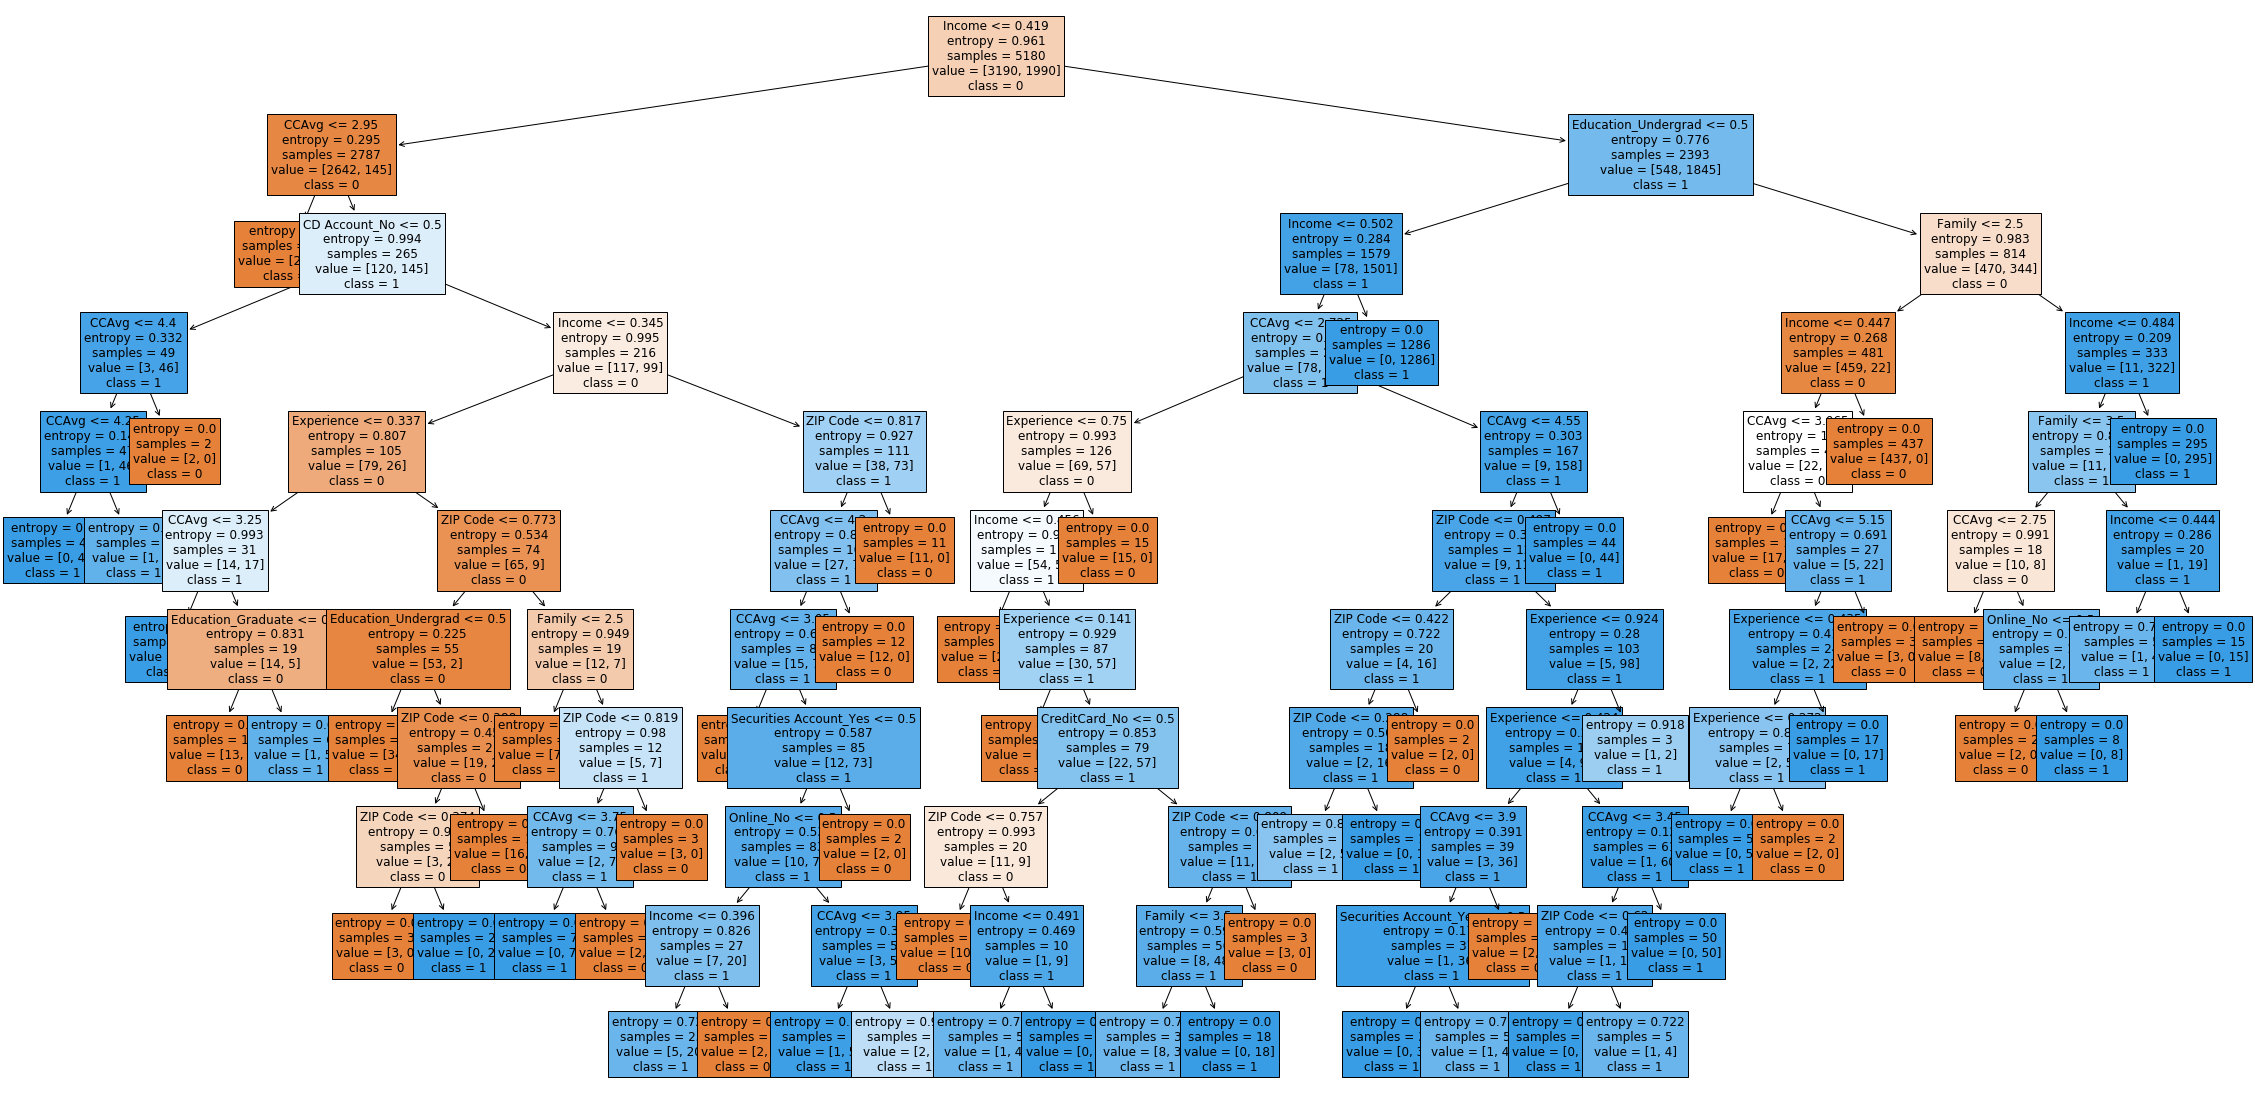

In [124]:
plt.figure(figsize=(40,20)) 
plot_tree(M2_d, fontsize = 12, feature_names = X_train.columns, filled = True, class_names = ["0","1"]);

In [102]:
Decision_Tree_after_grid = pd.Series({'Model': "Decision_Tree_after_Grid",
                     'AUC Score' : round(metrics.roc_auc_score(testPredDf_df["Actual"], testPredDf_df['Predicted_Class']) * 100,2),
                 'Precision Score': round(metrics.precision_score(testPredDf_df["Actual"], testPredDf_df['Predicted_Class']) * 100,2),
                 'Recall Score': round(metrics.recall_score(testPredDf_df["Actual"], testPredDf_df['Predicted_Class']) * 100,2),
                 'Accuracy Score': round(metrics.accuracy_score(testPredDf_df["Actual"], testPredDf_df['Predicted_Class']) * 100,2),
                 'Kappa Score':round(metrics.cohen_kappa_score(testPredDf_df["Actual"], testPredDf_df['Predicted_Class']) * 100,2),
                  'f1-score':round(metrics.f1_score(testPredDf_df["Actual"], testPredDf_df['Predicted_Class']) * 100,2)})



# appending our result table
result = result.append(Decision_Tree_after_grid, ignore_index = True)

# view the result table
result

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logestic_Regression,90.43,87.73,89.21,90.68,80.64,88.47
1,Decision_Tree_before_Grid,99.17,97.59,100.00,99.01,97.95,98.78
2,Decision_Tree_after_Grid,98.91,96.84,100.00,98.69,97.30,98.40


# Random Forest Classifier

In [104]:
from sklearn.ensemble import RandomForestClassifier
M3 = RandomForestClassifier(random_state=123)
M3 = M3.fit(X_train,y_train)

In [105]:
testPredDf_r = pd.DataFrame()

# Get probabilities
testPredDf_r['Predicted_Class'] = M3.predict(X_test) # Store probability predictions in "testX" df

# Create a column to store actuals
testPredDf_r["Actual"] = y_test.values

# Validate if the above worked
testPredDf_r.head()

,Predicted_Class,Actual
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1


In [106]:
confusionMatrix = pd.crosstab(testPredDf_r["Actual"], testPredDf_r['Predicted_Class']) # R, C format
confusionMatrix

Predicted_Class,0,1
Actual,,
0,1314,16
1,0,890


In [107]:
scores = accuracy_score(testPredDf_r["Actual"], testPredDf_r['Predicted_Class'])*100
scores

99.27927927927928

In [108]:
print(classification_report(testPredDf_r["Actual"], testPredDf_r['Predicted_Class']))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1330
           1       0.98      1.00      0.99       890

    accuracy                           0.99      2220
   macro avg       0.99      0.99      0.99      2220
weighted avg       0.99      0.99      0.99      2220



In [109]:
Random_Forest_before_grid = pd.Series({'Model': "Random_Forest_before_grid",
                     'AUC Score' : round(metrics.roc_auc_score(testPredDf_r["Actual"], testPredDf_r['Predicted_Class']) * 100,2),
                 'Precision Score': round(metrics.precision_score(testPredDf_r["Actual"], testPredDf_r['Predicted_Class']) * 100,2),
                 'Recall Score': round(metrics.recall_score(testPredDf_r["Actual"], testPredDf_r['Predicted_Class']) * 100,2),
                 'Accuracy Score': round(metrics.accuracy_score(testPredDf_r["Actual"], testPredDf_r['Predicted_Class']) * 100,2),
                 'Kappa Score':round(metrics.cohen_kappa_score(testPredDf_r["Actual"], testPredDf_r['Predicted_Class']) * 100,2),
                  'f1-score':round(metrics.f1_score(testPredDf_r["Actual"], testPredDf_r['Predicted_Class']) * 100,2)})



# appending our result table
result = result.append(Random_Forest_before_grid, ignore_index = True)

# view the result table
result

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logestic_Regression,90.43,87.73,89.21,90.68,80.64,88.47
1,Decision_Tree_before_Grid,99.17,97.59,100.00,99.01,97.95,98.78
2,Decision_Tree_after_Grid,98.91,96.84,100.00,98.69,97.30,98.40
3,Random_Forest_before_grid,99.40,98.23,100.00,99.28,98.50,99.11


# Hyperparameter tuning of the Random Forest Classifier 

In [131]:
myParamGrid = {
    "criterion":['gini','entropy'],
    'max_features': [7, 9, 11],
    'n_estimators':[100,300],
    'min_samples_leaf': [2, 3, 5, 10],
    'max_depth': [3,5,10]
} 
GridSearch_rf = GridSearchCV(M3,myParamGrid, cv=5,verbose = 2)
GridSearch_rf.fit(X_train,y_train)
print('Best grid parameters for Random Forest:', GridSearch_rf.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=2, n_estimators=300; total time=   0.7s
[CV] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=2, n_estimators=300; total time=   0.7s
[CV] END criterion=gini, max_depth=3, max_features=7, min_samples_leaf=2, n_estimators=300; total time=   0.7s
[CV] END criterion=gini, max_depth=3, max_feature

In [132]:
print('Best grid parameters for Random Forest:', GridSearch_dt.best_params_)

Best grid parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 2, 'n_estimators': 100}


#  Best params of Random Forest Classifier

In [110]:
M3_r = RandomForestClassifier(criterion = "entropy",max_depth = 10,max_features = 7,min_samples_leaf =2,n_estimators =100, random_state=123)
M3_r = M3_r.fit(X_train,y_train)

In [111]:
testPredDf_rf = pd.DataFrame()

# Get probabilities
testPredDf_rf['Predicted_Class'] = M3_r.predict(X_test) # Store probability predictions in "testX" df

# Create a column to store actuals
testPredDf_rf["Actual"] = y_test.values

# Validate if the above worked
testPredDf_rf.head()

,Predicted_Class,Actual
0,1,0
1,0,0
2,1,1
3,0,0
4,1,1


In [112]:
confusionMatrix = pd.crosstab(testPredDf_rf["Actual"], testPredDf_rf['Predicted_Class']) # R, C format
confusionMatrix

Predicted_Class,0,1
Actual,,
0,1304,26
1,0,890


In [113]:
scores = accuracy_score(testPredDf_rf["Actual"], testPredDf_rf['Predicted_Class'])*100
scores

98.82882882882883

In [114]:
print(classification_report(testPredDf_rf["Actual"], testPredDf_rf['Predicted_Class']))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1330
           1       0.97      1.00      0.99       890

    accuracy                           0.99      2220
   macro avg       0.99      0.99      0.99      2220
weighted avg       0.99      0.99      0.99      2220



In [115]:
Random_Forest_after_grid = pd.Series({'Model': "Random_Forest_after_grid",
                     'AUC Score' : round(metrics.roc_auc_score(testPredDf_rf["Actual"], testPredDf_rf['Predicted_Class']) * 100,2),
                 'Precision Score': round(metrics.precision_score(testPredDf_rf["Actual"], testPredDf_rf['Predicted_Class']) * 100,2),
                 'Recall Score': round(metrics.recall_score(testPredDf_rf["Actual"], testPredDf_rf['Predicted_Class']) * 100,2),
                 'Accuracy Score': round(metrics.accuracy_score(testPredDf_rf["Actual"], testPredDf_rf['Predicted_Class']) * 100,2),
                 'Kappa Score':round(metrics.cohen_kappa_score(testPredDf_rf["Actual"], testPredDf_rf['Predicted_Class']) * 100,2),
                  'f1-score':round(metrics.f1_score(testPredDf_rf["Actual"], testPredDf_rf['Predicted_Class']) * 100,2)})



# appending our result table
result = result.append(Random_Forest_after_grid, ignore_index = True)

# view the result table
result

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logestic_Regression,90.43,87.73,89.21,90.68,80.64,88.47
1,Decision_Tree_before_Grid,99.17,97.59,100.00,99.01,97.95,98.78
2,Decision_Tree_after_Grid,98.91,96.84,100.00,98.69,97.30,98.40
3,Random_Forest_before_grid,99.40,98.23,100.00,99.28,98.50,99.11
4,Random_Forest_after_grid,99.02,97.16,100.00,98.83,97.57,98.56


# Boosting Classifier

In [116]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.pipeline import Pipeline

#  Gradient Boosting Classifier

In [117]:
M4_g = GradientBoostingClassifier(random_state=123).fit(X_train, y_train) # Indep, Dep

In [118]:
testPredDf_g = pd.DataFrame()

# Get probabilities
testPredDf_g['Predicted_Class'] = M4_g.predict(X_test) # Store probability predictions in "testX" df

# Create a column to store actuals
testPredDf_g["Actual"] = y_test.values

# Validate if the above worked
testPredDf_g.sample(5)

,Predicted_Class,Actual
868,1,1
1064,0,0
1397,1,1
101,0,0
347,1,1


In [119]:
confusionMatrix = pd.crosstab(testPredDf_g["Actual"], testPredDf_g['Predicted_Class']) # R, C format
confusionMatrix

Predicted_Class,0,1
Actual,,
0,1295,35
1,8,882


In [120]:
scores = accuracy_score(testPredDf_g["Actual"], testPredDf_g['Predicted_Class'])*100
scores

98.06306306306305

In [121]:
print(classification_report(testPredDf_g["Actual"], testPredDf_g['Predicted_Class']))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1330
           1       0.96      0.99      0.98       890

    accuracy                           0.98      2220
   macro avg       0.98      0.98      0.98      2220
weighted avg       0.98      0.98      0.98      2220



In [122]:
Gradient_Boosting_Classifier = pd.Series({'Model': "Gradient_Boosting_Classifier",
                     'AUC Score' : round(metrics.roc_auc_score(testPredDf_g["Actual"], testPredDf_g['Predicted_Class']) * 100,2),
                 'Precision Score': round(metrics.precision_score(testPredDf_g["Actual"], testPredDf_g['Predicted_Class']) * 100,2),
                 'Recall Score': round(metrics.recall_score(testPredDf_g["Actual"], testPredDf_g['Predicted_Class']) * 100,2),
                 'Accuracy Score': round(metrics.accuracy_score(testPredDf_g["Actual"], testPredDf_g['Predicted_Class']) * 100,2),
                 'Kappa Score':round(metrics.cohen_kappa_score(testPredDf_g["Actual"], testPredDf_g['Predicted_Class']) * 100,2),
                  'f1-score':round(metrics.f1_score(testPredDf_g["Actual"], testPredDf_g['Predicted_Class']) * 100,2)})



# appending our result table
result = result.append(Gradient_Boosting_Classifier, ignore_index = True)

# view the result table
result

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logestic_Regression,90.43,87.73,89.21,90.68,80.64,88.47
1,Decision_Tree_before_Grid,99.17,97.59,100.00,99.01,97.95,98.78
2,Decision_Tree_after_Grid,98.91,96.84,100.00,98.69,97.30,98.40
3,Random_Forest_before_grid,99.40,98.23,100.00,99.28,98.50,99.11
4,Random_Forest_after_grid,99.02,97.16,100.00,98.83,97.57,98.56
5,Gradient_Boosting_Classifier,98.23,96.18,99.10,98.06,95.99,97.62


In [123]:
import warnings
warnings.filterwarnings("ignore")

# AdaBoosting Classifier

In [124]:
M4_a = AdaBoostClassifier(random_state = 123).fit(X_train,y_train)

In [125]:
testPredDf_a = pd.DataFrame()

# Get probabilities
testPredDf_a['Predicted_Class'] = M4_a.predict(X_test) # Store probability predictions in "testX" df

# Create a column to store actuals
testPredDf_a["Actual"] = y_test.values

# Validate if the above worked
testPredDf_a.sample(5)

,Predicted_Class,Actual
1131,1,1
444,0,0
124,0,0
654,1,1
1176,0,0


In [126]:
confusionMatrix = pd.crosstab(testPredDf_a["Actual"], testPredDf_a['Predicted_Class']) # R, C format
confusionMatrix

Predicted_Class,0,1
Actual,,
0,1251,79
1,65,825


In [127]:
scores = accuracy_score(testPredDf_a["Actual"], testPredDf_a['Predicted_Class'])*100
scores

93.51351351351352

In [128]:
print(classification_report(testPredDf_g["Actual"], testPredDf_g['Predicted_Class']))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1330
           1       0.96      0.99      0.98       890

    accuracy                           0.98      2220
   macro avg       0.98      0.98      0.98      2220
weighted avg       0.98      0.98      0.98      2220



In [129]:
Ada_Boosting_Classifier = pd.Series({'Model': "Ada_Boosting_Classifier",
                     'AUC Score' : round(metrics.roc_auc_score(testPredDf_a["Actual"], testPredDf_a['Predicted_Class']) * 100,2),
                 'Precision Score': round(metrics.precision_score(testPredDf_a["Actual"], testPredDf_a['Predicted_Class']) * 100,2),
                 'Recall Score': round(metrics.recall_score(testPredDf_a["Actual"], testPredDf_a['Predicted_Class']) * 100,2),
                 'Accuracy Score': round(metrics.accuracy_score(testPredDf_a["Actual"], testPredDf_a['Predicted_Class']) * 100,2),
                 'Kappa Score':round(metrics.cohen_kappa_score(testPredDf_a["Actual"], testPredDf_a['Predicted_Class']) * 100,2),
                  'f1-score':round(metrics.f1_score(testPredDf_a["Actual"], testPredDf_a['Predicted_Class']) * 100,2)})



# appending our result table
result = result.append(Ada_Boosting_Classifier, ignore_index = True)

# view the result table
result

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logestic_Regression,90.43,87.73,89.21,90.68,80.64,88.47
1,Decision_Tree_before_Grid,99.17,97.59,100.00,99.01,97.95,98.78
2,Decision_Tree_after_Grid,98.91,96.84,100.00,98.69,97.30,98.40
3,Random_Forest_before_grid,99.40,98.23,100.00,99.28,98.50,99.11
4,Random_Forest_after_grid,99.02,97.16,100.00,98.83,97.57,98.56
5,Gradient_Boosting_Classifier,98.23,96.18,99.10,98.06,95.99,97.62
6,Ada_Boosting_Classifier,93.38,91.26,92.70,93.51,86.53,91.97


# XGBoosting Classifier

In [130]:
M4_x = XGBClassifier(random_state = 123).fit(X_train,y_train)

[12:36:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [131]:
testPredDf_x = pd.DataFrame()

# Get probabilities
testPredDf_x['Predicted_Class'] = M4_x.predict(X_test) # Store probability predictions in "testX" df

# Create a column to store actuals
testPredDf_x["Actual"] = y_test.values

# Validate if the above worked
testPredDf_x.sample(5)

,Predicted_Class,Actual
1311,0,0
1548,1,1
1843,0,0
745,0,0
854,1,1


In [132]:
confusionMatrix = pd.crosstab(testPredDf_x["Actual"], testPredDf_x['Predicted_Class']) # R, C format
confusionMatrix

Predicted_Class,0,1
Actual,,
0,1310,20
1,0,890


In [133]:
scores = accuracy_score(testPredDf_x["Actual"], testPredDf_x['Predicted_Class'])*100
scores

99.09909909909909

In [134]:
print(classification_report(testPredDf_x["Actual"], testPredDf_x['Predicted_Class']))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1330
           1       0.98      1.00      0.99       890

    accuracy                           0.99      2220
   macro avg       0.99      0.99      0.99      2220
weighted avg       0.99      0.99      0.99      2220



In [135]:
Xg_Boosting_Classifier = pd.Series({'Model': "Xg_Boosting_Classifier",
                     'AUC Score' : round(metrics.roc_auc_score(testPredDf_x["Actual"], testPredDf_x['Predicted_Class']) * 100,2),
                 'Precision Score': round(metrics.precision_score(testPredDf_x["Actual"], testPredDf_x['Predicted_Class']) * 100,2),
                 'Recall Score': round(metrics.recall_score(testPredDf_x["Actual"], testPredDf_x['Predicted_Class']) * 100,2),
                 'Accuracy Score': round(metrics.accuracy_score(testPredDf_x["Actual"], testPredDf_x['Predicted_Class']) * 100,2),
                 'Kappa Score':round(metrics.cohen_kappa_score(testPredDf_x["Actual"], testPredDf_x['Predicted_Class']) * 100,2),
                  'f1-score':round(metrics.f1_score(testPredDf_x["Actual"], testPredDf_x['Predicted_Class']) * 100,2)})



# appending our result table
result = result.append(Xg_Boosting_Classifier, ignore_index = True)

# view the result table
result

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logestic_Regression,90.43,87.73,89.21,90.68,80.64,88.47
1,Decision_Tree_before_Grid,99.17,97.59,100.00,99.01,97.95,98.78
2,Decision_Tree_after_Grid,98.91,96.84,100.00,98.69,97.30,98.40
3,Random_Forest_before_grid,99.40,98.23,100.00,99.28,98.50,99.11
4,Random_Forest_after_grid,99.02,97.16,100.00,98.83,97.57,98.56
5,Gradient_Boosting_Classifier,98.23,96.18,99.10,98.06,95.99,97.62
6,Ada_Boosting_Classifier,93.38,91.26,92.70,93.51,86.53,91.97
7,Xg_Boosting_Classifier,99.25,97.80,100.00,99.10,98.13,98.89


# Hyperparameter tuning of boosting

In [138]:
from sklearn.model_selection import GridSearchCV
# Lay out the different models upfront
model1 = AdaBoostClassifier(random_state=123)
model2 = GradientBoostingClassifier(random_state=123)
model3 = XGBClassifier(random_state=123)

# Initialize the pipeline with a single model and you can add models later on
myPipeline = Pipeline(steps = [("model", model1)]) 
# The word "model" has to be SAME, to address other algorithms too.
# Instead of the word "model", you can use anything, like "abc" - but you have to ensure that "abc" is used 
# below while defining the other models/algorithms within myParamGrid. The word can be anything, but has to be consistent. 

# Add a dict of estimator and estimator related parameters in this list
myParamGrid = [
    {
        "model": [model1],
        "model__n_estimators": [10,20], # The format of using a "hyperparameter" is to append "name" with "double underscore"
        "model__learning_rate": [0.1, 0.5, 1]
    },
    {
        "model": [model2],
        "model__min_samples_leaf": [2,3,4],
        "model__max_depth": [3,4],
        "model__learning_rate": [0.1, 0.5, 1]
    },
    {
        "model": [model3],
        "model__lambda": [0,1,2],
        "model__gamma": [0,1]
    }]
# Check this link for more details on how to include mutliple algorithms in a single gridsearch implementation

gridSearchModels = GridSearchCV(
    estimator = myPipeline,
    param_grid = myParamGrid,
    scoring = "f1", 
    cv=3).fit(X_train, y_train) 

gridSearchModelsEvalDf = pd.DataFrame.from_dict(gridSearchModels.cv_results_)

[12:39:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:39:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:39:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:39:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [139]:
gridSearchModelsEvalDf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__learning_rate,param_model__n_estimators,param_model__max_depth,param_model__min_samples_leaf,param_model__gamma,param_model__lambda,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.046876,0.006459,0.010971,0.002940,AdaBoostClassifier(random_state=123),0.1,10,NaN,NaN,NaN,NaN,{'model': AdaBoostClassifier(random_state=123)...,0.854632,0.836957,0.833102,0.841563,0.009374,30
1,0.109044,0.008634,0.018959,0.002158,AdaBoostClassifier(random_state=123),0.1,20,NaN,NaN,NaN,NaN,{'model': AdaBoostClassifier(random_state=123)...,0.853372,0.848652,0.840702,0.847576,0.005229,29
2,0.045876,0.002818,0.009024,0.000896,AdaBoostClassifier(random_state=123),0.5,10,NaN,NaN,NaN,NaN,{'model': AdaBoostClassifier(random_state=123)...,0.875179,0.869628,0.894428,0.879745,0.010627,28
3,0.083341,0.002208,0.012538,0.000608,AdaBoostClassifier(random_state=123),0.5,20,NaN,NaN,NaN,NaN,{'model': AdaBoostClassifier(random_state=123)...,0.902655,0.918958,0.915718,0.912443,0.007047,25
4,0.052664,0.012827,0.009523,0.001176,AdaBoostClassifier(random_state=123),1,10,NaN,NaN,NaN,NaN,{'model': AdaBoostClassifier(random_state=123)...,0.912917,0.916129,0.903659,0.910902,0.005286,27
5,0.090439,0.007288,0.013663,0.000435,AdaBoostClassifier(random_state=123),1,20,NaN,NaN,NaN,NaN,{'model': AdaBoostClassifier(random_state=123)...,0.908414,0.923968,0.903861,0.912081,0.008609,26
6,0.527505,0.033655,0.009391,0.001145,"GradientBoostingClassifier(learning_rate=0.5, ...",0.1,NaN,3,2,NaN,NaN,{'model': GradientBoostingClassifier(learning_...,0.978342,0.973214,0.979745,0.977100,0.002807,23
7,0.573900,0.069816,0.010969,0.002157,"GradientBoostingClassifier(learning_rate=0.5, ...",0.1,NaN,3,3,NaN,NaN,{'model': GradientBoostingClassifier(learning_...,0.980597,0.972409,0.976744,0.976583,0.003345,24
8,0.677176,0.011982,0.011981,0.002803,"GradientBoostingClassifier(learning_rate=0.5, ...",0.1,NaN,3,4,NaN,NaN,{'model': GradientBoostingClassifier(learning_...,0.980626,0.970194,0.982694,0.977838,0.005471,22
9,0.872330,0.017736,0.013301,0.000941,"GradientBoostingClassifier(learning_rate=0.5, ...",0.1,NaN,4,2,NaN,NaN,{'model': GradientBoostingClassifier(learning_...,0.984433,0.979896,0.987266,0.983865,0.003036,19


# Best params of Boosting 

In [140]:
M4_gf= GradientBoostingClassifier(learning_rate = 0.5,max_depth = 4,min_samples_leaf = 2).fit(X_train,y_train)

In [141]:
testPredDf_gf = pd.DataFrame()

# Get probabilities
testPredDf_gf['Predicted_Class'] = M4_gf.predict(X_test) # Store probability predictions in "testX" df

# Create a column to store actuals
testPredDf_gf["Actual"] = y_test.values

# Validate if the above worked
testPredDf_gf.sample(5)

,Predicted_Class,Actual
444,0,0
1363,0,0
1934,1,0
681,0,0
1668,0,0


In [142]:
confusionMatrix = pd.crosstab(testPredDf_gf["Actual"], testPredDf_gf['Predicted_Class']) # R, C format
confusionMatrix

Predicted_Class,0,1
Actual,,
0,1312,18
1,0,890


In [143]:
scores = accuracy_score(testPredDf_gf["Actual"], testPredDf_gf['Predicted_Class'])*100
scores

99.1891891891892

In [144]:
print(classification_report(testPredDf_x["Actual"], testPredDf_x['Predicted_Class']))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1330
           1       0.98      1.00      0.99       890

    accuracy                           0.99      2220
   macro avg       0.99      0.99      0.99      2220
weighted avg       0.99      0.99      0.99      2220



In [145]:
Boosting_after_grid = pd.Series({'Model': "Boosting_after_grid",
                     'AUC Score' : round(metrics.roc_auc_score(testPredDf_gf["Actual"], testPredDf_gf['Predicted_Class']) * 100,2),
                 'Precision Score': round(metrics.precision_score(testPredDf_gf["Actual"], testPredDf_gf['Predicted_Class']) * 100,2),
                 'Recall Score': round(metrics.recall_score(testPredDf_gf["Actual"], testPredDf_gf['Predicted_Class']) * 100,2),
                 'Accuracy Score': round(metrics.accuracy_score(testPredDf_gf["Actual"], testPredDf_gf['Predicted_Class']) * 100,2),
                 'Kappa Score':round(metrics.cohen_kappa_score(testPredDf_gf["Actual"], testPredDf_gf['Predicted_Class']) * 100,2),
                  'f1-score':round(metrics.f1_score(testPredDf_gf["Actual"], testPredDf_gf['Predicted_Class']) * 100,2)})



# appending our result table
result = result.append(Boosting_after_grid , ignore_index = True)

# view the result table
result

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logestic_Regression,90.43,87.73,89.21,90.68,80.64,88.47
1,Decision_Tree_before_Grid,99.17,97.59,100.00,99.01,97.95,98.78
2,Decision_Tree_after_Grid,98.91,96.84,100.00,98.69,97.30,98.40
3,Random_Forest_before_grid,99.40,98.23,100.00,99.28,98.50,99.11
4,Random_Forest_after_grid,99.02,97.16,100.00,98.83,97.57,98.56
5,Gradient_Boosting_Classifier,98.23,96.18,99.10,98.06,95.99,97.62
6,Ada_Boosting_Classifier,93.38,91.26,92.70,93.51,86.53,91.97
7,Xg_Boosting_Classifier,99.25,97.80,100.00,99.10,98.13,98.89
8,Boosting_after_grid,99.32,98.02,100.00,99.19,98.32,99.00


# Naive Bayes

In [146]:
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier


In [147]:
gnb = GaussianNB()
M5_GNB = OneVsRestClassifier(gnb).fit(X_train,y_train)

In [148]:
testPredDf_gnb = pd.DataFrame()

# Get probabilities
testPredDf_gnb['Predicted_Class'] = M5_GNB.predict(X_test) # Store probability predictions in "testX" df

# Create a column to store actuals
testPredDf_gnb["Actual"] = y_test.values

# Validate if the above worked
testPredDf_gnb.sample(5)

,Predicted_Class,Actual
39,0,0
701,0,1
457,0,0
1786,0,0
1174,1,1


In [149]:
confusionMatrix = pd.crosstab(testPredDf_gnb["Actual"], testPredDf_gnb['Predicted_Class']) # R, C format
confusionMatrix

Predicted_Class,0,1
Actual,,
0,1213,117
1,203,687


In [150]:
scores = accuracy_score(testPredDf_gnb["Actual"], testPredDf_gnb['Predicted_Class'])*100
scores

85.58558558558559

In [151]:
print(classification_report(testPredDf_gnb["Actual"], testPredDf_gnb['Predicted_Class']))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1330
           1       0.85      0.77      0.81       890

    accuracy                           0.86      2220
   macro avg       0.86      0.84      0.85      2220
weighted avg       0.86      0.86      0.85      2220



In [152]:
Naive_Bayes = pd.Series({'Model': "Naive_Bayes",
                     'AUC Score' : round(metrics.roc_auc_score(testPredDf_gnb["Actual"], testPredDf_gnb['Predicted_Class']) * 100,2),
                 'Precision Score': round(metrics.precision_score(testPredDf_gnb["Actual"], testPredDf_gnb['Predicted_Class']) * 100,2),
                 'Recall Score': round(metrics.recall_score(testPredDf_gnb["Actual"], testPredDf_gnb['Predicted_Class']) * 100,2),
                 'Accuracy Score': round(metrics.accuracy_score(testPredDf_gnb["Actual"], testPredDf_gnb['Predicted_Class']) * 100,2),
                 'Kappa Score':round(metrics.cohen_kappa_score(testPredDf_gnb["Actual"], testPredDf_gnb['Predicted_Class']) * 100,2),
                  'f1-score':round(metrics.f1_score(testPredDf_gnb["Actual"], testPredDf_gnb['Predicted_Class']) * 100,2)})



# appending our result table
result = result.append(Naive_Bayes , ignore_index = True)

# view the result table
result

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logestic_Regression,90.43,87.73,89.21,90.68,80.64,88.47
1,Decision_Tree_before_Grid,99.17,97.59,100.00,99.01,97.95,98.78
2,Decision_Tree_after_Grid,98.91,96.84,100.00,98.69,97.30,98.40
3,Random_Forest_before_grid,99.40,98.23,100.00,99.28,98.50,99.11
4,Random_Forest_after_grid,99.02,97.16,100.00,98.83,97.57,98.56
5,Gradient_Boosting_Classifier,98.23,96.18,99.10,98.06,95.99,97.62
6,Ada_Boosting_Classifier,93.38,91.26,92.70,93.51,86.53,91.97
7,Xg_Boosting_Classifier,99.25,97.80,100.00,99.10,98.13,98.89
8,Boosting_after_grid,99.32,98.02,100.00,99.19,98.32,99.00
9,Naive_Bayes,84.20,85.45,77.19,85.59,69.50,81.11


# KNN Classifier

In [154]:
from sklearn.neighbors import KNeighborsClassifier
knn_classification = KNeighborsClassifier(n_neighbors = 3)

In [155]:
M6_knn = knn_classification.fit(X_train, y_train)

In [156]:
testPredDf_knn = pd.DataFrame()

# Get probabilities
testPredDf_knn['Predicted_Class'] = M6_knn.predict(X_test) # Store probability predictions in "testX" df

# Create a column to store actuals
testPredDf_knn["Actual"] = y_test.values

# Validate if the above worked
testPredDf_knn.sample(5)

,Predicted_Class,Actual
1269,0,0
568,1,1
1575,1,1
1188,0,0
2099,0,0


In [157]:
confusionMatrix = pd.crosstab(testPredDf_knn["Actual"], testPredDf_knn['Predicted_Class']) # R, C format
confusionMatrix

Predicted_Class,0,1
Actual,,
0,1285,45
1,15,875


In [158]:
scores = accuracy_score(testPredDf_knn["Actual"], testPredDf_knn['Predicted_Class'])*100
scores

97.2972972972973

In [159]:
print(classification_report(testPredDf_knn["Actual"], testPredDf_knn['Predicted_Class']))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1330
           1       0.95      0.98      0.97       890

    accuracy                           0.97      2220
   macro avg       0.97      0.97      0.97      2220
weighted avg       0.97      0.97      0.97      2220



In [160]:
Knn_before_grid = pd.Series({'Model': "Knn_before_grid",
                     'AUC Score' : round(metrics.roc_auc_score(testPredDf_knn["Actual"], testPredDf_knn['Predicted_Class']) * 100,2),
                 'Precision Score': round(metrics.precision_score(testPredDf_knn["Actual"], testPredDf_knn['Predicted_Class']) * 100,2),
                 'Recall Score': round(metrics.recall_score(testPredDf_knn["Actual"], testPredDf_knn['Predicted_Class']) * 100,2),
                 'Accuracy Score': round(metrics.accuracy_score(testPredDf_knn["Actual"], testPredDf_knn['Predicted_Class']) * 100,2),
                 'Kappa Score':round(metrics.cohen_kappa_score(testPredDf_knn["Actual"], testPredDf_knn['Predicted_Class']) * 100,2),
                  'f1-score':round(metrics.f1_score(testPredDf_knn["Actual"], testPredDf_knn['Predicted_Class']) * 100,2)})



# appending our result table
result = result.append(Knn_before_grid , ignore_index = True)

# view the result table
result

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logestic_Regression,90.43,87.73,89.21,90.68,80.64,88.47
1,Decision_Tree_before_Grid,99.17,97.59,100.00,99.01,97.95,98.78
2,Decision_Tree_after_Grid,98.91,96.84,100.00,98.69,97.30,98.40
3,Random_Forest_before_grid,99.40,98.23,100.00,99.28,98.50,99.11
4,Random_Forest_after_grid,99.02,97.16,100.00,98.83,97.57,98.56
5,Gradient_Boosting_Classifier,98.23,96.18,99.10,98.06,95.99,97.62
6,Ada_Boosting_Classifier,93.38,91.26,92.70,93.51,86.53,91.97
7,Xg_Boosting_Classifier,99.25,97.80,100.00,99.10,98.13,98.89
8,Boosting_after_grid,99.32,98.02,100.00,99.19,98.32,99.00
9,Naive_Bayes,84.20,85.45,77.19,85.59,69.50,81.11


# Hyperparameter tuning of Knn classifier

In [187]:
myParamGrid = {
    'n_neighbors':np.arange(1,50)
    
} 
GridSearch_knn = GridSearchCV(M6_knn,myParamGrid, cv=5,verbose = 2)
GridSearch_knn.fit(X_train,y_train)
print('Best grid parameters for knn:', GridSearch_knn.best_params_)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................

In [188]:
print('Best grid parameters for knn:', GridSearch_knn.best_params_)

Best grid parameters for knn: {'n_neighbors': 1}


# Best params of Knn classifier

In [161]:
knn_classification = KNeighborsClassifier(n_neighbors = 1)
M6_knnf = knn_classification.fit(X_train, y_train)

In [162]:
testPredDf_knnf = pd.DataFrame()

# Get probabilities
testPredDf_knnf['Predicted_Class'] = M6_knnf.predict(X_test) # Store probability predictions in "testX" df

# Create a column to store actuals
testPredDf_knnf["Actual"] = y_test.values

# Validate if the above worked
testPredDf_knn.sample(5)

,Predicted_Class,Actual
446,1,1
1613,0,0
1356,1,1
1245,0,0
1349,1,1


In [163]:
confusionMatrix = pd.crosstab(testPredDf_knnf["Actual"], testPredDf_knnf['Predicted_Class']) # R, C format
confusionMatrix

Predicted_Class,0,1
Actual,,
0,1317,13
1,0,890


In [164]:
scores = accuracy_score(testPredDf_knnf["Actual"], testPredDf_knnf['Predicted_Class'])*100
scores

99.41441441441441

In [165]:
print(classification_report(testPredDf_knnf["Actual"], testPredDf_knnf['Predicted_Class']))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1330
           1       0.99      1.00      0.99       890

    accuracy                           0.99      2220
   macro avg       0.99      1.00      0.99      2220
weighted avg       0.99      0.99      0.99      2220



In [166]:
Knn_after_grid = pd.Series({'Model': "Knn_after_grid",
                     'AUC Score' : round(metrics.roc_auc_score(testPredDf_knnf["Actual"], testPredDf_knnf['Predicted_Class']) * 100,2),
                 'Precision Score': round(metrics.precision_score(testPredDf_knnf["Actual"], testPredDf_knnf['Predicted_Class']) * 100,2),
                 'Recall Score': round(metrics.recall_score(testPredDf_knnf["Actual"], testPredDf_knnf['Predicted_Class']) * 100,2),
                 'Accuracy Score': round(metrics.accuracy_score(testPredDf_knnf["Actual"], testPredDf_knnf['Predicted_Class']) * 100,2),
                 'Kappa Score':round(metrics.cohen_kappa_score(testPredDf_knnf["Actual"], testPredDf_knnf['Predicted_Class']) * 100,2),
                  'f1-score':round(metrics.f1_score(testPredDf_knnf["Actual"], testPredDf_knnf['Predicted_Class']) * 100,2)})



# appending our result table
result = result.append(Knn_after_grid , ignore_index = True)

# view the result table
result

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logestic_Regression,90.43,87.73,89.21,90.68,80.64,88.47
1,Decision_Tree_before_Grid,99.17,97.59,100.00,99.01,97.95,98.78
2,Decision_Tree_after_Grid,98.91,96.84,100.00,98.69,97.30,98.40
3,Random_Forest_before_grid,99.40,98.23,100.00,99.28,98.50,99.11
4,Random_Forest_after_grid,99.02,97.16,100.00,98.83,97.57,98.56
5,Gradient_Boosting_Classifier,98.23,96.18,99.10,98.06,95.99,97.62
6,Ada_Boosting_Classifier,93.38,91.26,92.70,93.51,86.53,91.97
7,Xg_Boosting_Classifier,99.25,97.80,100.00,99.10,98.13,98.89
8,Boosting_after_grid,99.32,98.02,100.00,99.19,98.32,99.00
9,Naive_Bayes,84.20,85.45,77.19,85.59,69.50,81.11


# Support Vector Classifier

In [167]:
from sklearn.svm import SVC
M7_svc= SVC(kernel='sigmoid').fit(X_train,y_train)

In [168]:
testPredDf_svc = pd.DataFrame()

# Get probabilities
testPredDf_svc['Predicted_Class'] = M7_svc.predict(X_test) # Store probability predictions in "testX" df

# Create a column to store actuals
testPredDf_svc["Actual"] = y_test.values

# Validate if the above worked
testPredDf_knn.sample(5)

,Predicted_Class,Actual
1367,1,1
401,0,0
545,1,1
1228,1,0
296,1,1


In [169]:
confusionMatrix = pd.crosstab(testPredDf_svc["Actual"], testPredDf_svc['Predicted_Class']) # R, C format
confusionMatrix

Predicted_Class,0,1
Actual,,
0,781,549
1,604,286


In [170]:
scores = accuracy_score(testPredDf_svc["Actual"], testPredDf_svc['Predicted_Class'])*100
scores

48.06306306306306

In [171]:
print(classification_report(testPredDf_svc["Actual"], testPredDf_svc['Predicted_Class']))

              precision    recall  f1-score   support

           0       0.56      0.59      0.58      1330
           1       0.34      0.32      0.33       890

    accuracy                           0.48      2220
   macro avg       0.45      0.45      0.45      2220
weighted avg       0.48      0.48      0.48      2220



In [172]:
svm_before_grid = pd.Series({'Model': "svm_before_grid",
                     'AUC Score' : round(metrics.roc_auc_score(testPredDf_svc["Actual"], testPredDf_svc['Predicted_Class']) * 100,2),
                 'Precision Score': round(metrics.precision_score(testPredDf_svc["Actual"], testPredDf_svc['Predicted_Class']) * 100,2),
                 'Recall Score': round(metrics.recall_score(testPredDf_svc["Actual"], testPredDf_svc['Predicted_Class']) * 100,2),
                 'Accuracy Score': round(metrics.accuracy_score(testPredDf_svc["Actual"], testPredDf_svc['Predicted_Class']) * 100,2),
                 'Kappa Score':round(metrics.cohen_kappa_score(testPredDf_svc["Actual"], testPredDf_svc['Predicted_Class']) * 100,2),
                  'f1-score':round(metrics.f1_score(testPredDf_svc["Actual"], testPredDf_svc['Predicted_Class']) * 100,2)})



# appending our result table
result = result.append(svm_before_grid, ignore_index = True)

# view the result table
result

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logestic_Regression,90.43,87.73,89.21,90.68,80.64,88.47
1,Decision_Tree_before_Grid,99.17,97.59,100.00,99.01,97.95,98.78
2,Decision_Tree_after_Grid,98.91,96.84,100.00,98.69,97.30,98.40
3,Random_Forest_before_grid,99.40,98.23,100.00,99.28,98.50,99.11
4,Random_Forest_after_grid,99.02,97.16,100.00,98.83,97.57,98.56
5,Gradient_Boosting_Classifier,98.23,96.18,99.10,98.06,95.99,97.62
6,Ada_Boosting_Classifier,93.38,91.26,92.70,93.51,86.53,91.97
7,Xg_Boosting_Classifier,99.25,97.80,100.00,99.10,98.13,98.89
8,Boosting_after_grid,99.32,98.02,100.00,99.19,98.32,99.00
9,Naive_Bayes,84.20,85.45,77.19,85.59,69.50,81.11


# Hyperparameter tuning of SVC

In [204]:
myParamGrid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','sigmoid','linear','poly']} 
GridSearch_svc = GridSearchCV(M7_svc,myParamGrid, cv=5,verbose = 2)
GridSearch_svc.fit(X_train,y_train)
print('Best grid parameters for svc:', GridSearch_svc.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.7s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   2.3s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   2.4s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   1.8s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   1.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   1.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.2s
[CV] END ......................C=0.1, gamma=1,

In [205]:
print('Best grid parameters for svc:', GridSearch_svc.best_params_)

Best grid parameters for svc: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}


# Best params of SVC 

In [173]:
M7_svcf= SVC(kernel='rbf',C = 100,gamma = 1).fit(X_train,y_train)

In [174]:
testPredDf_svcf = pd.DataFrame()

# Get probabilities
testPredDf_svcf['Predicted_Class'] = M7_svcf.predict(X_test) # Store probability predictions in "testX" df

# Create a column to store actuals
testPredDf_svcf["Actual"] = y_test.values

# Validate if the above worked
testPredDf_svcf.sample(5)

,Predicted_Class,Actual
969,1,0
1159,0,0
505,0,0
1432,1,1
1693,0,0


In [175]:
confusionMatrix = pd.crosstab(testPredDf_svcf["Actual"], testPredDf_svcf['Predicted_Class']) # R, C format
confusionMatrix

Predicted_Class,0,1
Actual,,
0,1317,13
1,0,890


In [176]:
scores = accuracy_score(testPredDf_svcf["Actual"], testPredDf_svcf['Predicted_Class'])*100
scores

99.41441441441441

In [177]:
print(classification_report(testPredDf_svcf["Actual"], testPredDf_svcf['Predicted_Class']))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1330
           1       0.99      1.00      0.99       890

    accuracy                           0.99      2220
   macro avg       0.99      1.00      0.99      2220
weighted avg       0.99      0.99      0.99      2220



In [178]:
svm_after_grid = pd.Series({'Model': "svm_after_grid",
                     'AUC Score' : round(metrics.roc_auc_score(testPredDf_svcf["Actual"], testPredDf_svcf['Predicted_Class']) * 100,2),
                 'Precision Score': round(metrics.precision_score(testPredDf_svcf["Actual"], testPredDf_svcf['Predicted_Class']) * 100,2),
                 'Recall Score': round(metrics.recall_score(testPredDf_svcf["Actual"], testPredDf_svcf['Predicted_Class']) * 100,2),
                 'Accuracy Score': round(metrics.accuracy_score(testPredDf_svcf["Actual"], testPredDf_svcf['Predicted_Class']) * 100,2),
                 'Kappa Score':round(metrics.cohen_kappa_score(testPredDf_svcf["Actual"], testPredDf_svcf['Predicted_Class']) * 100,2),
                  'f1-score':round(metrics.f1_score(testPredDf_svcf["Actual"], testPredDf_svcf['Predicted_Class']) * 100,2)})



# appending our result table
result = result.append(svm_after_grid, ignore_index = True)

# view the result table
result

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logestic_Regression,90.43,87.73,89.21,90.68,80.64,88.47
1,Decision_Tree_before_Grid,99.17,97.59,100.00,99.01,97.95,98.78
2,Decision_Tree_after_Grid,98.91,96.84,100.00,98.69,97.30,98.40
3,Random_Forest_before_grid,99.40,98.23,100.00,99.28,98.50,99.11
4,Random_Forest_after_grid,99.02,97.16,100.00,98.83,97.57,98.56
5,Gradient_Boosting_Classifier,98.23,96.18,99.10,98.06,95.99,97.62
6,Ada_Boosting_Classifier,93.38,91.26,92.70,93.51,86.53,91.97
7,Xg_Boosting_Classifier,99.25,97.80,100.00,99.10,98.13,98.89
8,Boosting_after_grid,99.32,98.02,100.00,99.19,98.32,99.00
9,Naive_Bayes,84.20,85.45,77.19,85.59,69.50,81.11


In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

In [190]:
plt.figure(figsize = (11,10))

<Figure size 792x720 with 0 Axes>

<Figure size 792x720 with 0 Axes>

# AUC Score 

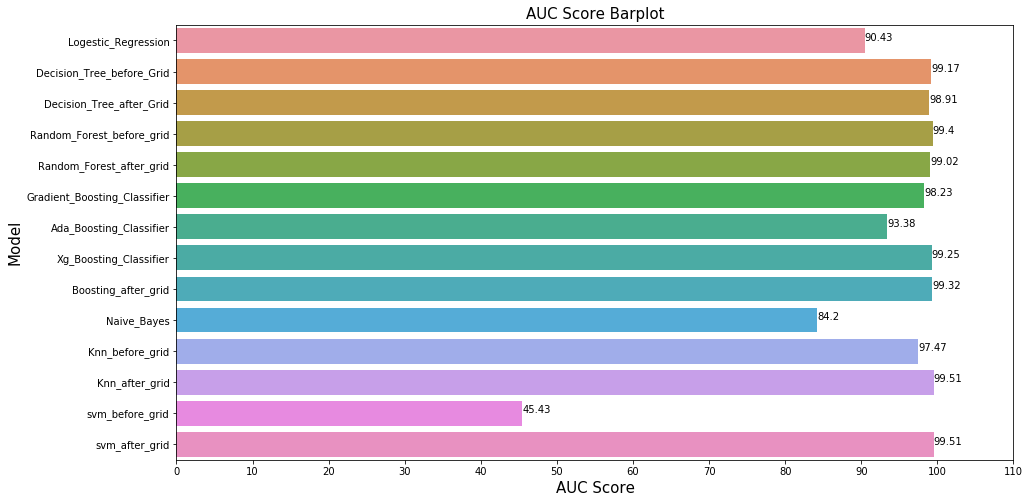

In [213]:
plt.figure(figsize = (15,8))
plt.rcParams.update({'font.size': 10})
AUC_Score = sns.barplot('AUC Score','Model',data=result)
plt.text(result["AUC Score"][0],0, result["AUC Score"][0])
plt.text(result["AUC Score"][1],1, result["AUC Score"][1])
plt.text(result["AUC Score"][2],2, result["AUC Score"][2])
plt.text(result["AUC Score"][3],3, result["AUC Score"][3])
plt.text(result["AUC Score"][4],4, result["AUC Score"][4])
plt.text(result["AUC Score"][5],5, result["AUC Score"][5])
plt.text(result["AUC Score"][6],6, result["AUC Score"][6])
plt.text(result["AUC Score"][7],7, result["AUC Score"][7])
plt.text(result["AUC Score"][8],8, result["AUC Score"][8])
plt.text(result["AUC Score"][9],9, result["AUC Score"][9])
plt.text(result["AUC Score"][10],10, result["AUC Score"][10])
plt.text(result["AUC Score"][11],11, result["AUC Score"][11])
plt.text(result["AUC Score"][12],12, result["AUC Score"][12])
plt.text(result["AUC Score"][13],13, result["AUC Score"][13])
plt.xlabel('AUC Score', fontsize=15)
plt.xticks(np.arange(0,120,10))
plt.ylabel("Model",fontsize = 15)
AUC_Score.set_title('AUC Score Barplot',fontsize =15)
plt.show();

# Precision Score

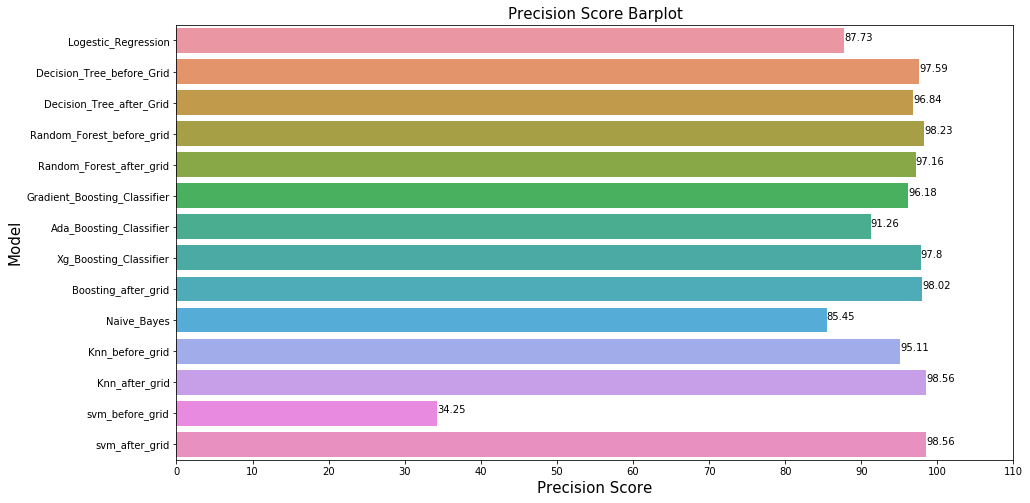

In [212]:
plt.figure(figsize = (15,8))
plt.rcParams.update({'font.size': 10})
Precision_Score = sns.barplot('Precision Score','Model',data=result)
plt.text(result["Precision Score"][0],0, result["Precision Score"][0])
plt.text(result["Precision Score"][1],1, result["Precision Score"][1])
plt.text(result["Precision Score"][2],2, result["Precision Score"][2])
plt.text(result["Precision Score"][3],3, result["Precision Score"][3])
plt.text(result["Precision Score"][4],4, result["Precision Score"][4])
plt.text(result["Precision Score"][5],5, result["Precision Score"][5])
plt.text(result["Precision Score"][6],6, result["Precision Score"][6])
plt.text(result["Precision Score"][7],7, result["Precision Score"][7])
plt.text(result["Precision Score"][8],8, result["Precision Score"][8])
plt.text(result["Precision Score"][9],9, result["Precision Score"][9])
plt.text(result["Precision Score"][10],10, result["Precision Score"][10])
plt.text(result["Precision Score"][11],11, result["Precision Score"][11])
plt.text(result["Precision Score"][12],12, result["Precision Score"][12])
plt.text(result["Precision Score"][13],13, result["Precision Score"][13])
Precision_Score.set_title('Precision Score Barplot',fontsize = 15)
plt.xlabel('Precision Score', fontsize=15)
plt.xticks(np.arange(0,120,10))
plt.ylabel("Model",fontsize = 15)
plt.show()

# Recall Score

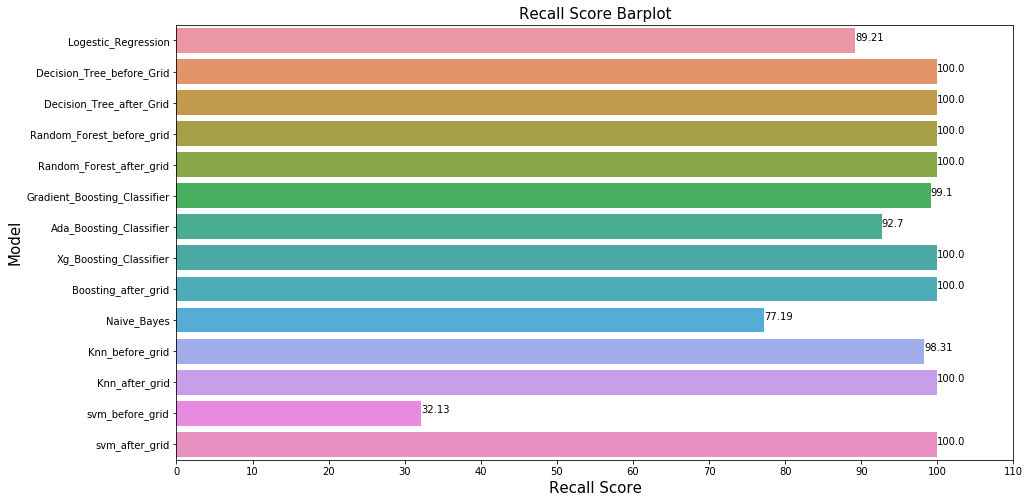

In [215]:
plt.figure(figsize = (15,8))
plt.rcParams.update({'font.size': 10})
Recall_Score = sns.barplot('Recall Score','Model',data=result)
plt.text(result["Recall Score"][0],0, result["Recall Score"][0])
plt.text(result["Recall Score"][1],1, result["Recall Score"][1])
plt.text(result["Recall Score"][2],2, result["Recall Score"][2])
plt.text(result["Recall Score"][3],3, result["Recall Score"][3])
plt.text(result["Recall Score"][4],4, result["Recall Score"][4])
plt.text(result["Recall Score"][5],5, result["Recall Score"][5])
plt.text(result["Recall Score"][6],6, result["Recall Score"][6])
plt.text(result["Recall Score"][7],7, result["Recall Score"][7])
plt.text(result["Recall Score"][8],8, result["Recall Score"][8])
plt.text(result["Recall Score"][9],9, result["Recall Score"][9])
plt.text(result["Recall Score"][10],10, result["Recall Score"][10])
plt.text(result["Recall Score"][11],11, result["Recall Score"][11])
plt.text(result["Recall Score"][12],12, result["Recall Score"][12])
plt.text(result["Recall Score"][13],13, result["Recall Score"][13])
Recall_Score.set_title('Recall Score Barplot',fontsize = 15)
plt.xlabel('Recall Score', fontsize=15)
plt.xticks(np.arange(0,120,10))
plt.ylabel("Model",fontsize = 15)
plt.show()

# Accuracy Score

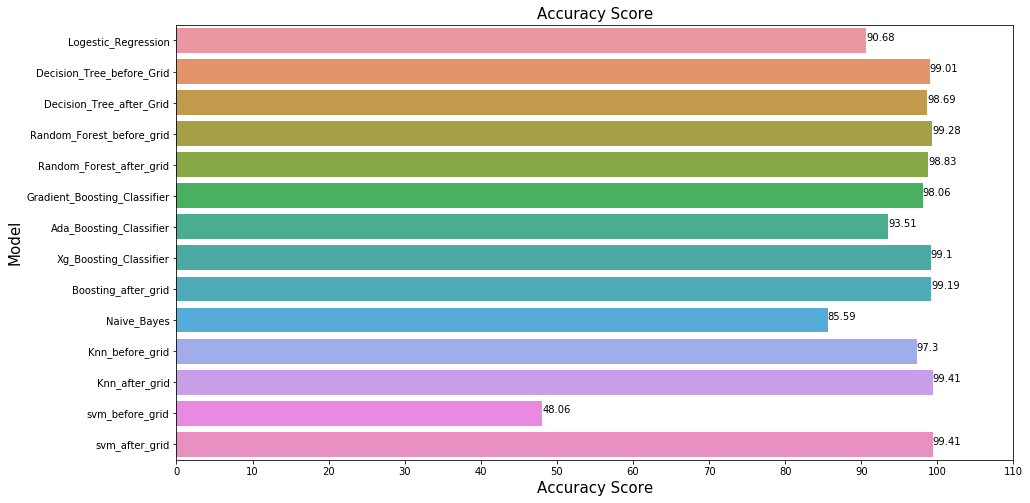

In [216]:
plt.figure(figsize = (15,8))
plt.rcParams.update({'font.size': 10})
Accuracy_Score = sns.barplot('Accuracy Score','Model',data=result)
plt.text(result["Accuracy Score"][0],0, result["Accuracy Score"][0])
plt.text(result["Accuracy Score"][1],1, result["Accuracy Score"][1])
plt.text(result["Accuracy Score"][2],2, result["Accuracy Score"][2])
plt.text(result["Accuracy Score"][3],3, result["Accuracy Score"][3])
plt.text(result["Accuracy Score"][4],4, result["Accuracy Score"][4])
plt.text(result["Accuracy Score"][5],5, result["Accuracy Score"][5])
plt.text(result["Accuracy Score"][6],6, result["Accuracy Score"][6])
plt.text(result["Accuracy Score"][7],7, result["Accuracy Score"][7])
plt.text(result["Accuracy Score"][8],8, result["Accuracy Score"][8])
plt.text(result["Accuracy Score"][9],9, result["Accuracy Score"][9])
plt.text(result["Accuracy Score"][10],10, result["Accuracy Score"][10])
plt.text(result["Accuracy Score"][11],11, result["Accuracy Score"][11])
plt.text(result["Accuracy Score"][12],12, result["Accuracy Score"][12])
plt.text(result["Accuracy Score"][13],13, result["Accuracy Score"][13])
plt.xlabel('Accuracy Score', fontsize=15)
plt.xticks(np.arange(0,120,10))
plt.ylabel("Model",fontsize = 15)
Accuracy_Score.set_title('Accuracy Score',fontsize = 15)
plt.show()

# Kappa Score

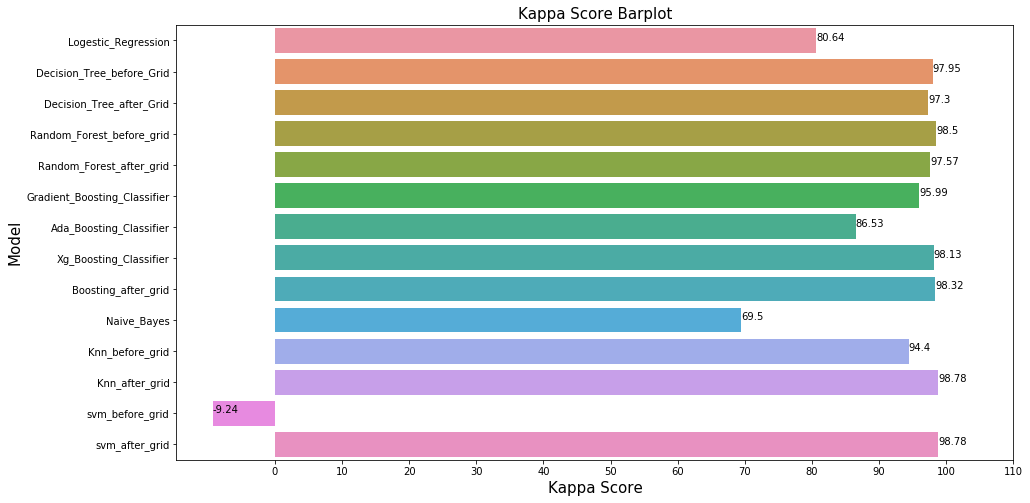

In [225]:
plt.figure(figsize = (15,8))
Kappa_Score = sns.barplot('Kappa Score','Model',data=result)
plt.text(result["Kappa Score"][0],0, result["Kappa Score"][0])
plt.text(result["Kappa Score"][1],1, result["Kappa Score"][1])
plt.text(result["Kappa Score"][2],2, result["Kappa Score"][2])
plt.text(result["Kappa Score"][3],3, result["Kappa Score"][3])
plt.text(result["Kappa Score"][4],4, result["Kappa Score"][4])
plt.text(result["Kappa Score"][5],5, result["Kappa Score"][5])
plt.text(result["Kappa Score"][6],6, result["Kappa Score"][6])
plt.text(result["Kappa Score"][7],7, result["Kappa Score"][7])
plt.text(result["Kappa Score"][8],8, result["Kappa Score"][8])
plt.text(result["Kappa Score"][9],9, result["Kappa Score"][9])
plt.text(result["Kappa Score"][10],10, result["Kappa Score"][10])
plt.text(result["Kappa Score"][11],11, result["Kappa Score"][11])
plt.text(result["Kappa Score"][12],12, result["Kappa Score"][12])
plt.text(result["Kappa Score"][13],13, result["Kappa Score"][13])
plt.xlabel('Kappa Score', fontsize=15)
plt.xticks(np.arange(0,120,10))
plt.ylabel("Model",fontsize = 15)
Kappa_Score.set_title('Kappa Score Barplot',fontsize = 15)
plt.show()

# F1-Score

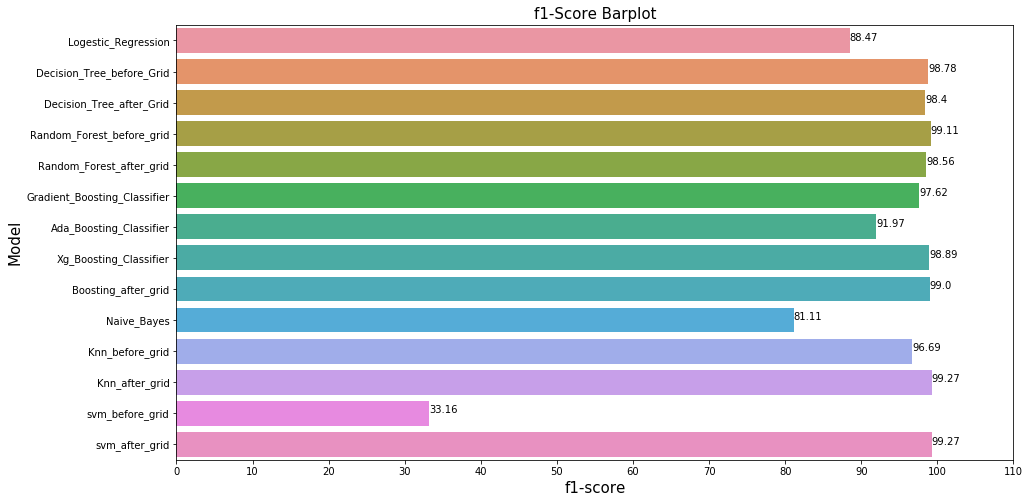

In [226]:
plt.figure(figsize = (15,8))
f1_Score = sns.barplot('f1-score','Model',data=result)
plt.text(result["f1-score"][0],0, result["f1-score"][0])
plt.text(result["f1-score"][1],1, result["f1-score"][1])
plt.text(result["f1-score"][2],2, result["f1-score"][2])
plt.text(result["f1-score"][3],3, result["f1-score"][3])
plt.text(result["f1-score"][4],4, result["f1-score"][4])
plt.text(result["f1-score"][5],5, result["f1-score"][5])
plt.text(result["f1-score"][6],6, result["f1-score"][6])
plt.text(result["f1-score"][7],7, result["f1-score"][7])
plt.text(result["f1-score"][8],8, result["f1-score"][8])
plt.text(result["f1-score"][9],9, result["f1-score"][9])
plt.text(result["f1-score"][10],10, result["f1-score"][10])
plt.text(result["f1-score"][11],11, result["f1-score"][11])
plt.text(result["f1-score"][12],12, result["f1-score"][12])
plt.text(result["f1-score"][13],13, result["f1-score"][13])
plt.xlabel('f1-score', fontsize=15)
plt.xticks(np.arange(0,120,10))
plt.ylabel("Model",fontsize = 15)
f1_Score.set_title('f1-Score Barplot',fontsize = 15)
plt.show()